<a href="https://colab.research.google.com/github/marlonmcarvalho/ITS304_GROUP14/blob/main/IT304_UFGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/marlonmcarvalho/ITS304_GROUP14.git


fatal: destination path 'ITS304_GROUP14' already exists and is not an empty directory.


# Definição e Dados


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [ ]:
abas_de_excel = pd.ExcelFile('/content/ITS304_GROUP14/Dados UFGD_sDregP.xlsx')
abas_de_excel.sheet_names

['Apresentação', 'UC1']

In [ ]:
UC1 = abas_de_excel.parse("UC1")
UC1.shape


(59, 33)

In [ ]:
UC1.head()

DATA   ANO  MÊS  ...  Energ_Atv_Inj_FP  TAR_INJ_KWH_P  TAR_INJ_KWH_FP
0 2015-07-01  2015    7  ...               NaN            NaN             NaN
1 2015-08-01  2015    8  ...               NaN            NaN             NaN
2 2015-09-01  2015    9  ...               NaN            NaN             NaN
3 2015-10-01  2015   10  ...               NaN            NaN             NaN
4 2015-11-01  2015   11  ...               NaN            NaN             NaN

[5 rows x 33 columns]

# Data Preparation

Visualização dos dados faltantes

In [ ]:
import missingno as msno


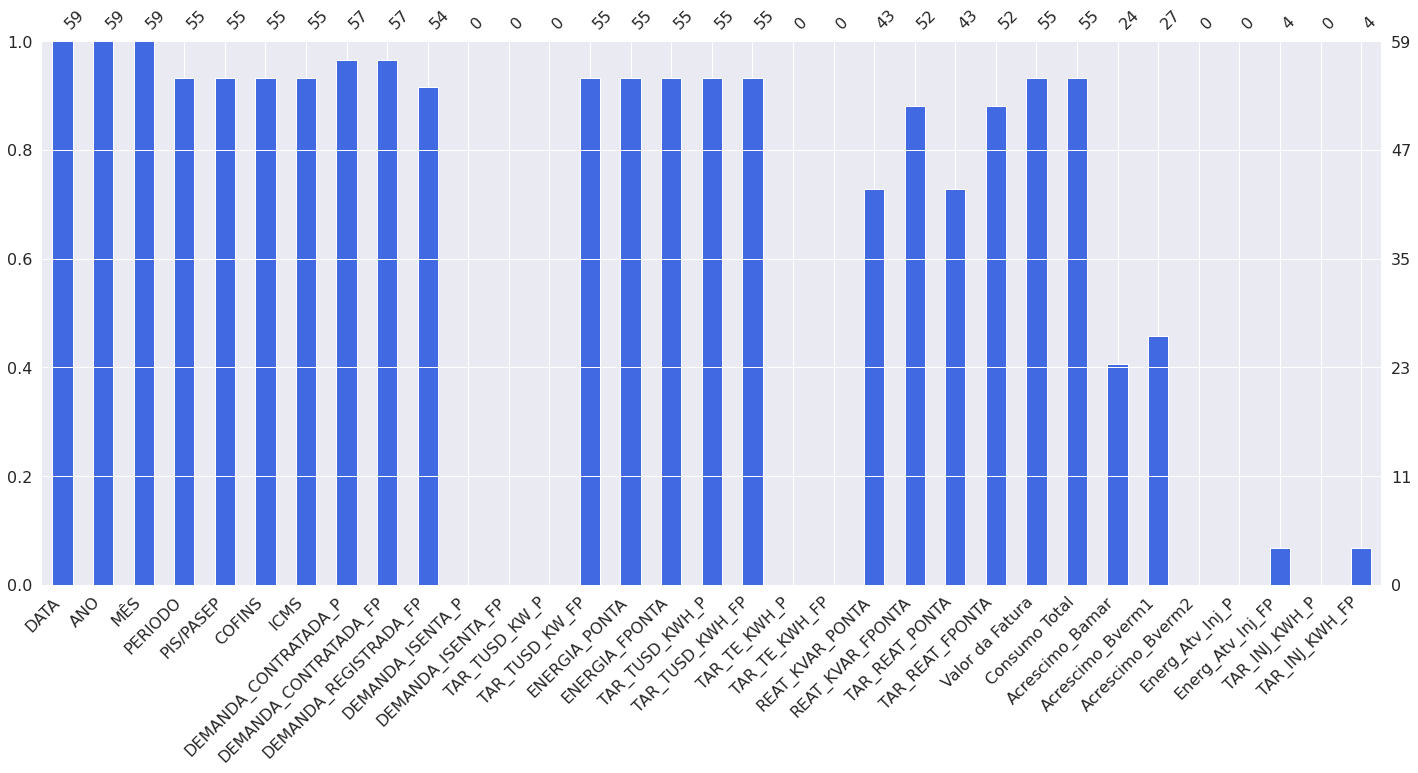

In [ ]:
msno.bar(UC1, color="RoyalBlue") #Visualizar integridade dos dados

## Matriz de dados faltantes





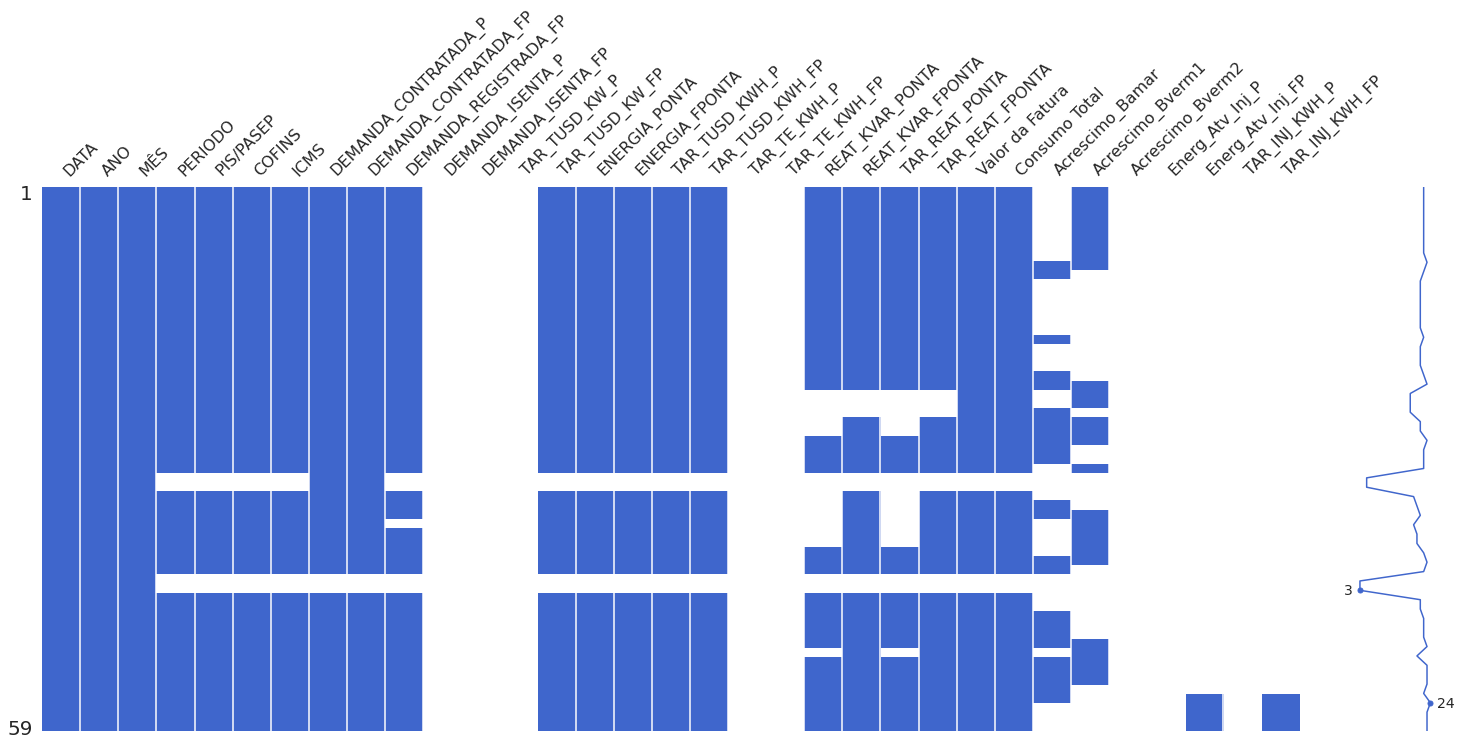

In [ ]:
msno.matrix(UC1, color = (0.25,0.4,0.8))


## Matriz de correlação de dados faltantes

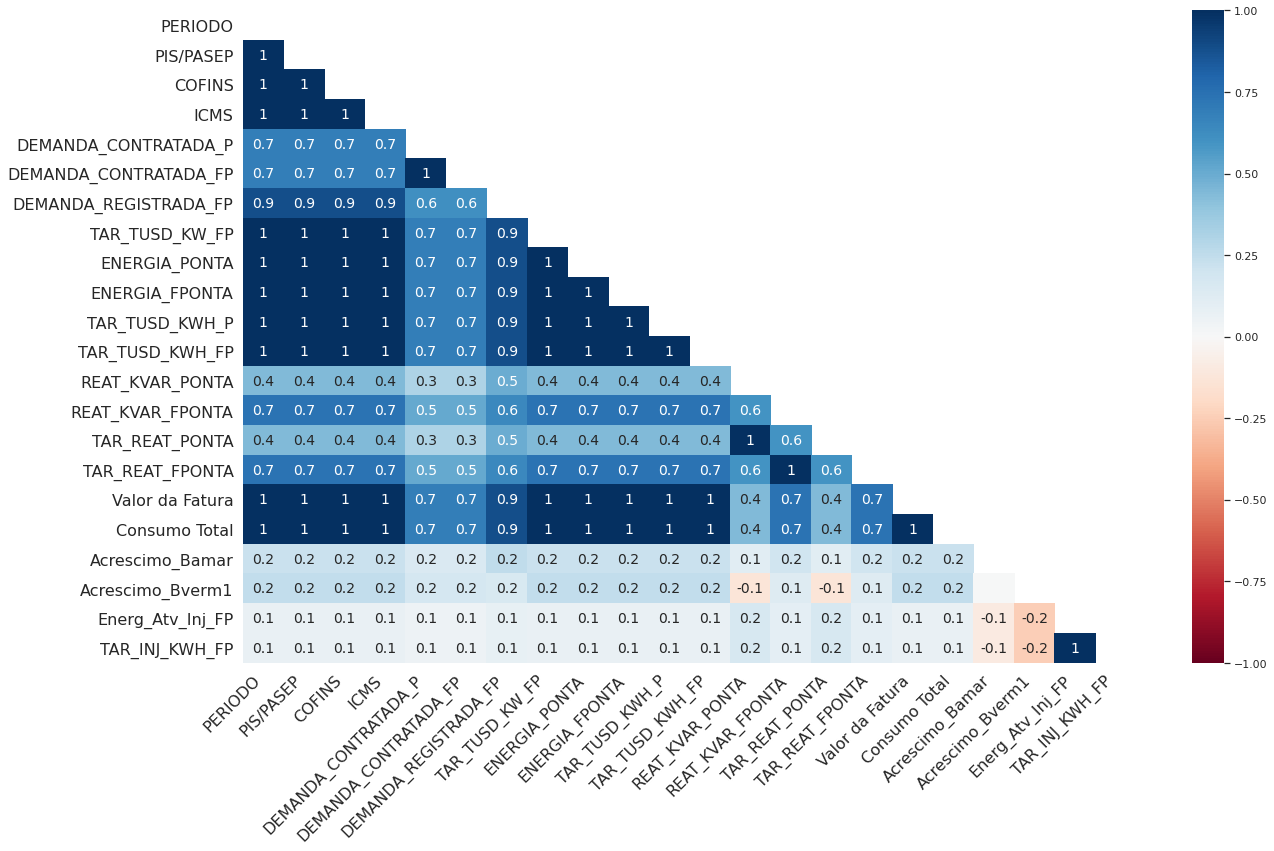

In [ ]:
msno.heatmap(UC1)


## Dendrogram de dados faltantes


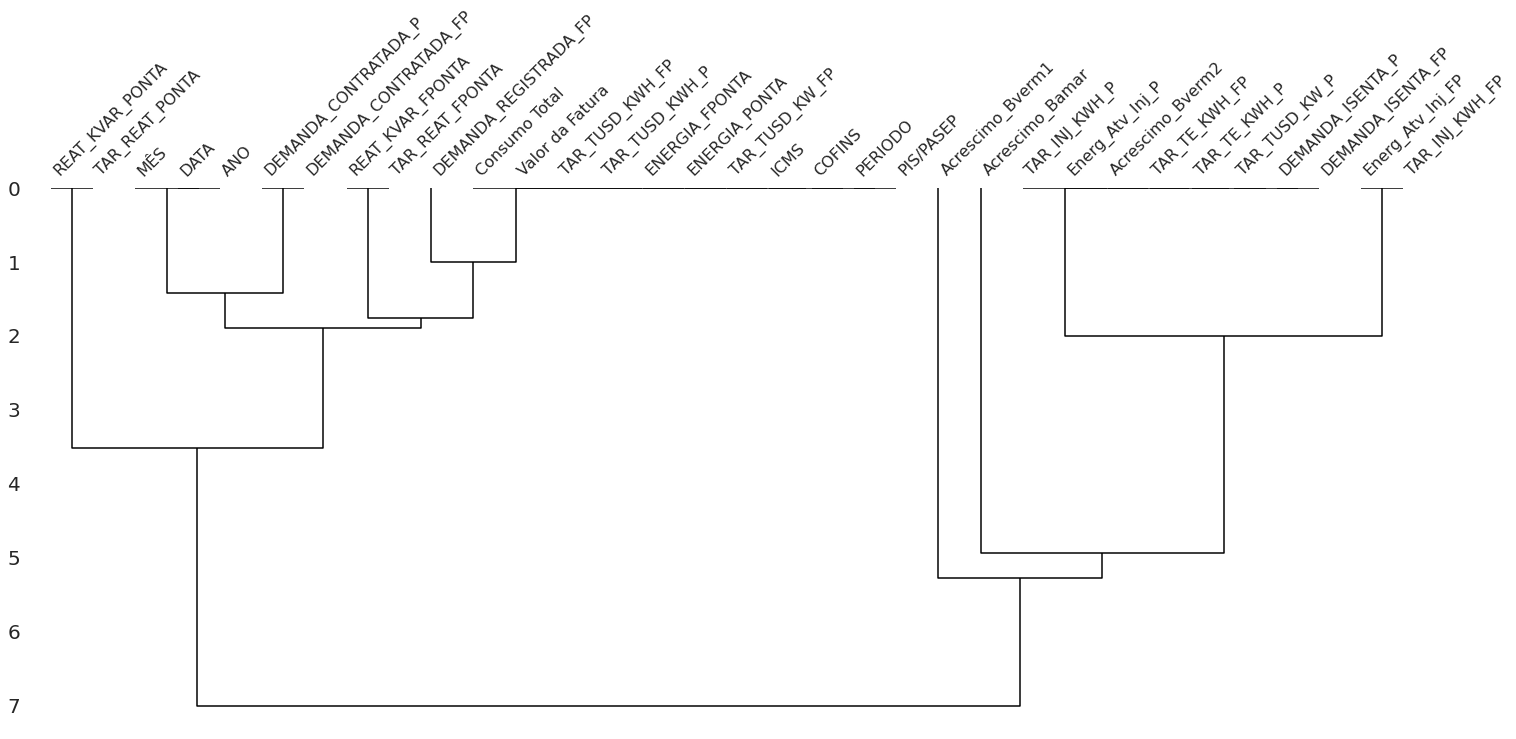

In [ ]:
msno.dendrogram(UC1)


## Eliminação de dados faltantes

In [ ]:
UC1_df = UC1.drop(set(UC1.columns[UC1.isnull().mean() >0.5]),1)
UC1_df.shape


(59, 21)

## Visualização de variaveis

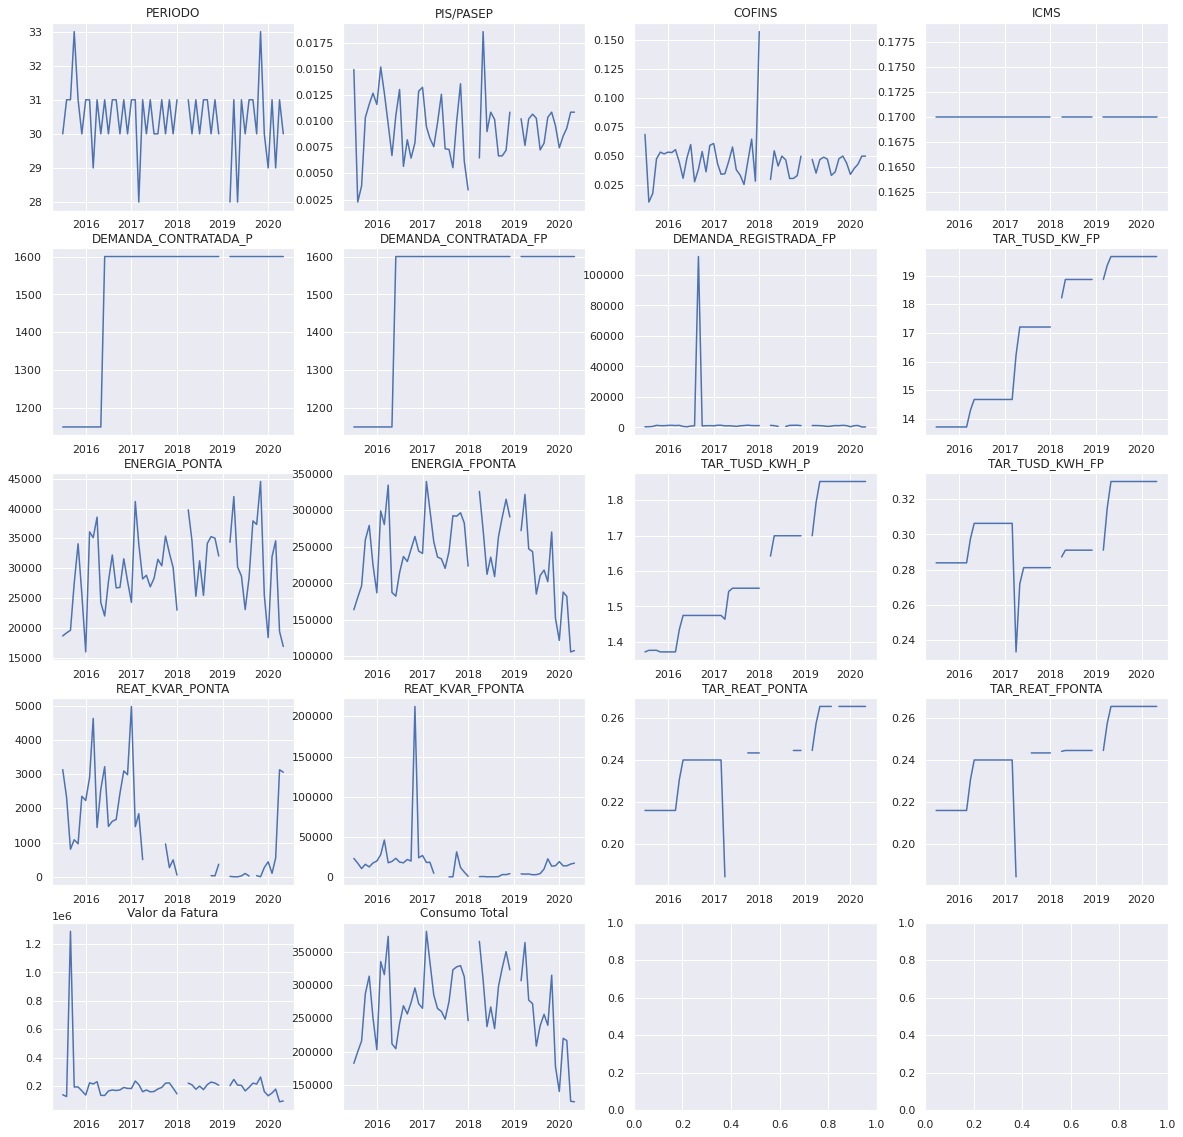

In [ ]:
f, axs = plt.subplots(5,4,figsize=(20,20))
for i,col in enumerate(UC1_df.columns[3:]):
  plt.subplot(5,4,i+1)
  plt.title(col)
  plt.plot(UC1_df.DATA, UC1_df[col])


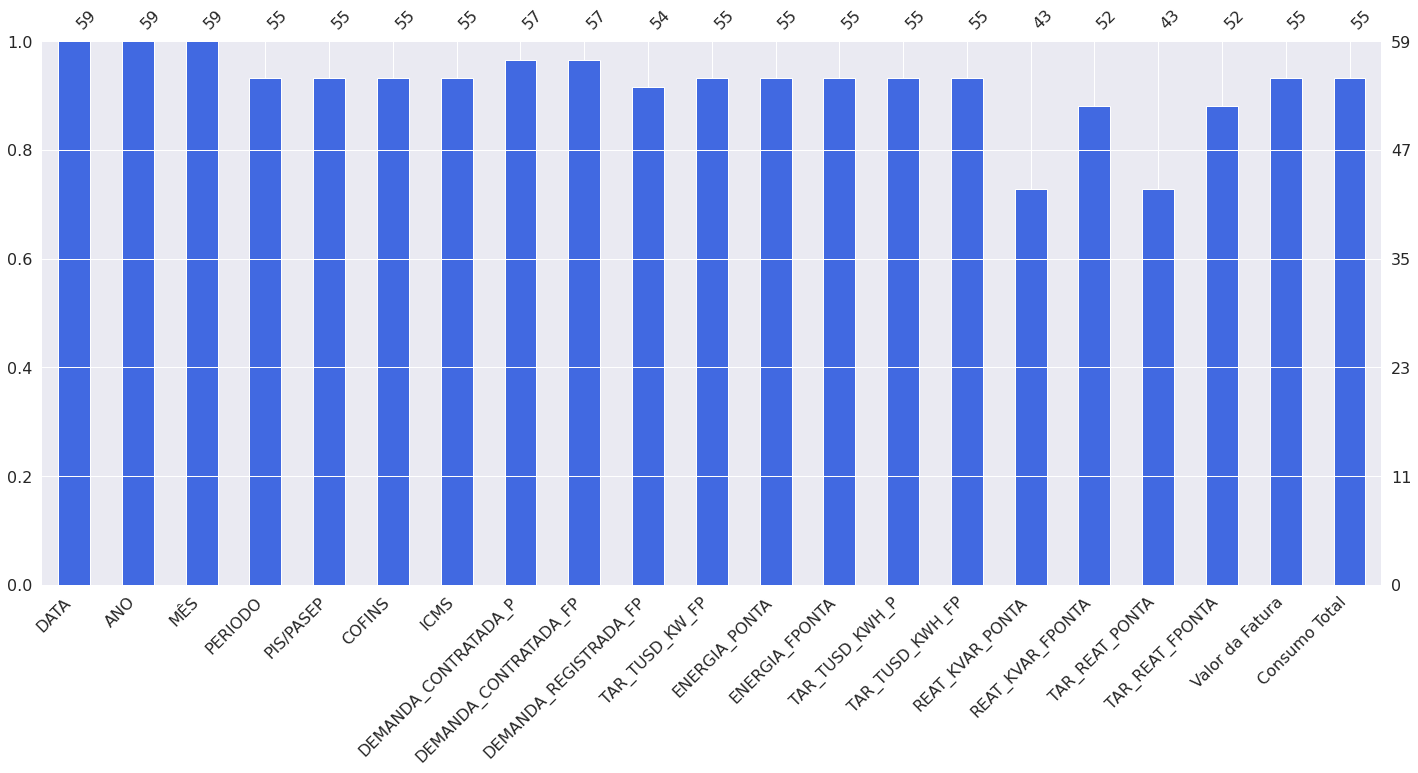

In [ ]:
msno.bar(UC1_df, color="RoyalBlue")

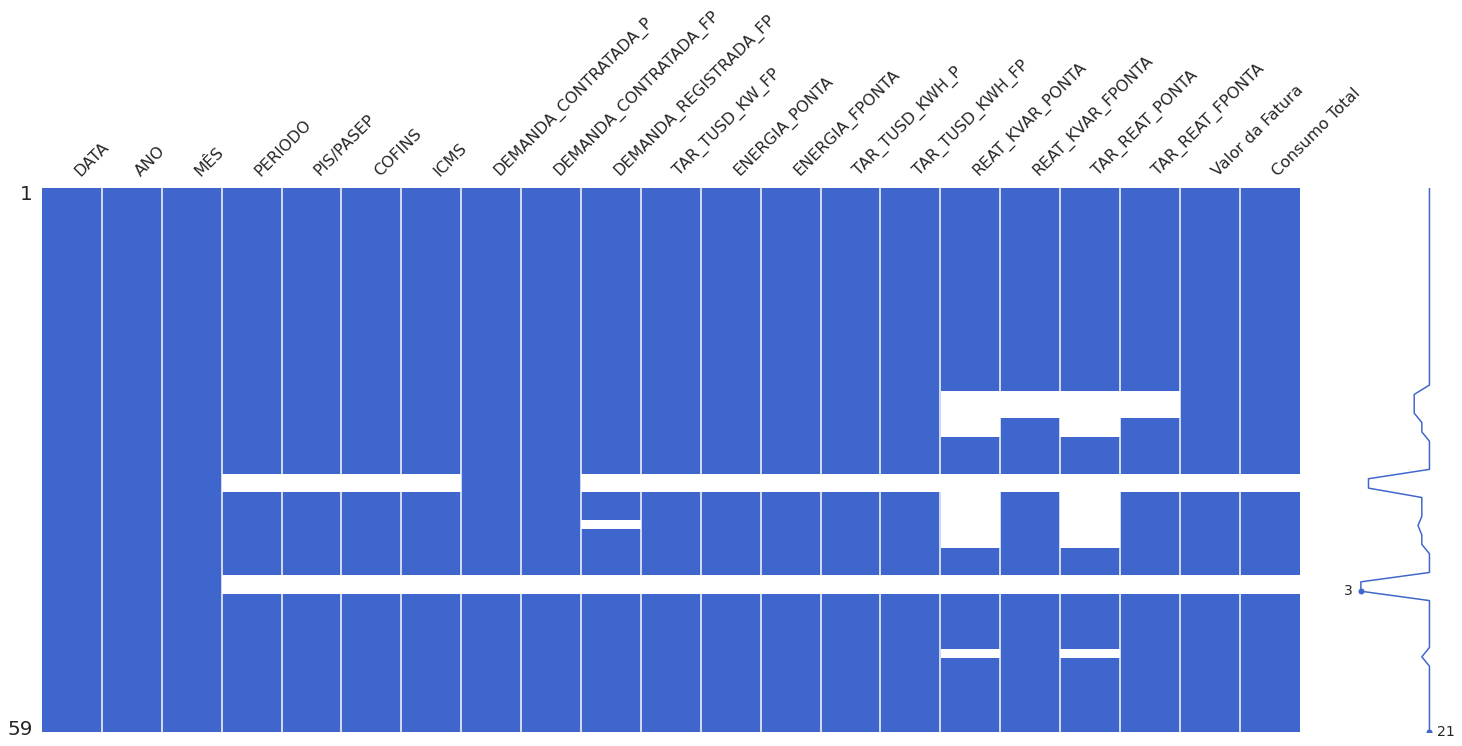

In [ ]:
msno.matrix(UC1_df, color = (0.25,0.4,0.8))

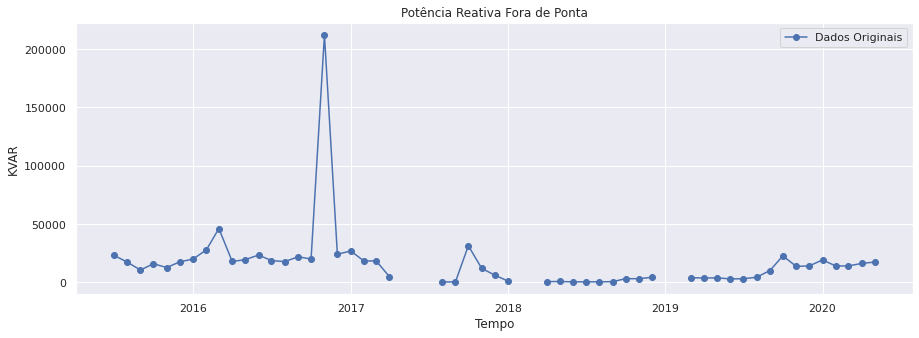

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
_ = plt.plot(UC1_df.DATA, UC1_df.REAT_KVAR_FPONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Dados Originais'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

## Imputações

### Imputação


In [ ]:
#Corrigindo um erro de digitação que afetará o trabalho adiante e removendo alguns outliers para serem preenchidos por interpolação
UC1_df.head()


DATA   ANO  MÊS  ...  TAR_REAT_FPONTA  Valor da Fatura  Consumo Total
0 2015-07-01  2015    7  ...          0.21605        140514.01       182489.0
1 2015-08-01  2015    8  ...          0.21605        127804.52       199860.0
2 2015-09-01  2015    9  ...          0.21605       1288520.95       216188.0
3 2015-10-01  2015   10  ...          0.21605        195058.38       287139.0
4 2015-11-01  2015   11  ...          0.21605        195375.59       313387.0

[5 rows x 21 columns]

In [ ]:
UC1_df.rename(columns = {'Valor da Fatura':'Valor_da_Fatura'}, inplace = True) #Altera nome da coluna Valor da Fatura para consertar erro causado pela / no nome da coluna
UC1_df.rename(columns = {'Consumo Total':'Consumo_Total'}, inplace = True) # Esses espaços causam erros aditante

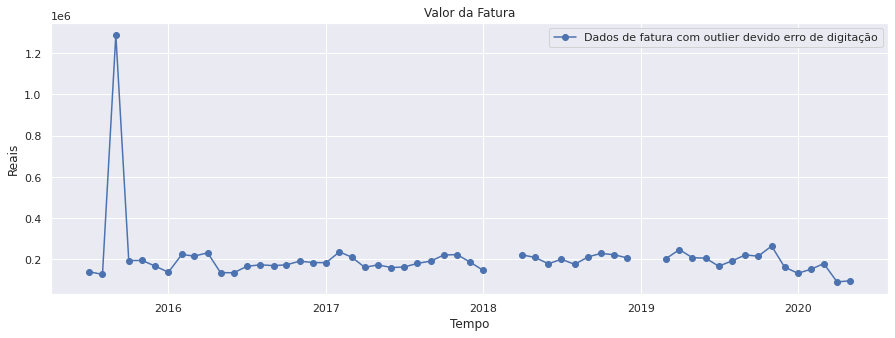

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_df.DATA, UC1_df.Valor_da_Fatura, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Reais")
_ = plt.legend(['Dados de fatura com outlier devido erro de digitação'])
_ = plt.title("Valor da Fatura")
plt.show()

In [ ]:
# conferindo o outlier acima, em milhoes de reais notamos um erro de digitação. Antes da imputação corrigiremos esse dado com o valor correto
UC1_df.head()

DATA   ANO  MÊS  ...  TAR_REAT_FPONTA  Valor_da_Fatura  Consumo_Total
0 2015-07-01  2015    7  ...          0.21605        140514.01       182489.0
1 2015-08-01  2015    8  ...          0.21605        127804.52       199860.0
2 2015-09-01  2015    9  ...          0.21605       1288520.95       216188.0
3 2015-10-01  2015   10  ...          0.21605        195058.38       287139.0
4 2015-11-01  2015   11  ...          0.21605        195375.59       313387.0

[5 rows x 21 columns]

In [ ]:
#como o mesmo se encontra a segunda linha, 20 coluna temos
position = 2
label = 'Valor_da_Fatura'
UC1_df.loc[position,label] = 128852.95
output = UC1_df.at[position,label]
print(output)

128852.95


In [ ]:
UC1_df.head()

DATA   ANO  MÊS  ...  TAR_REAT_FPONTA  Valor_da_Fatura  Consumo_Total
0 2015-07-01  2015    7  ...          0.21605        140514.01       182489.0
1 2015-08-01  2015    8  ...          0.21605        127804.52       199860.0
2 2015-09-01  2015    9  ...          0.21605        128852.95       216188.0
3 2015-10-01  2015   10  ...          0.21605        195058.38       287139.0
4 2015-11-01  2015   11  ...          0.21605        195375.59       313387.0

[5 rows x 21 columns]

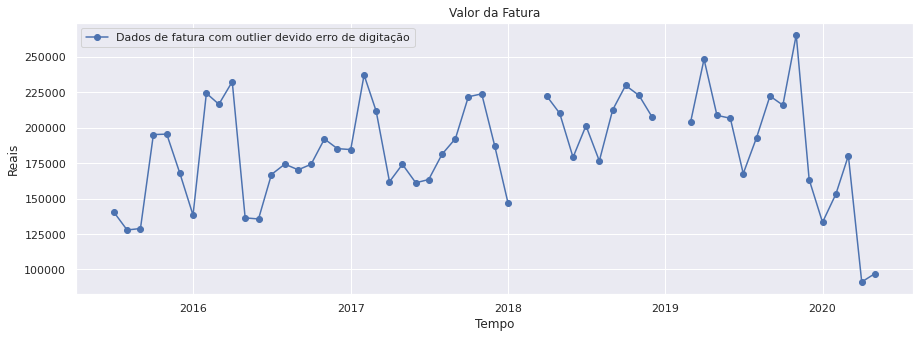

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_df.DATA, UC1_df.Valor_da_Fatura, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Reais")
_ = plt.legend(['Dados de fatura com outlier devido erro de digitação'])
_ = plt.title("Valor da Fatura")
plt.show() #Valor Corrigido

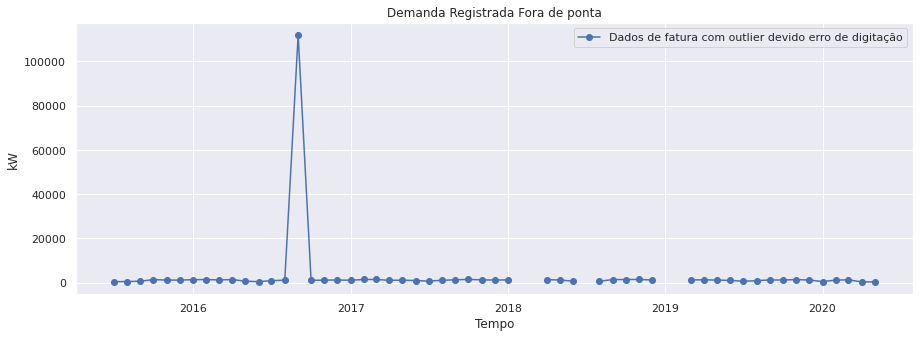

112032.0


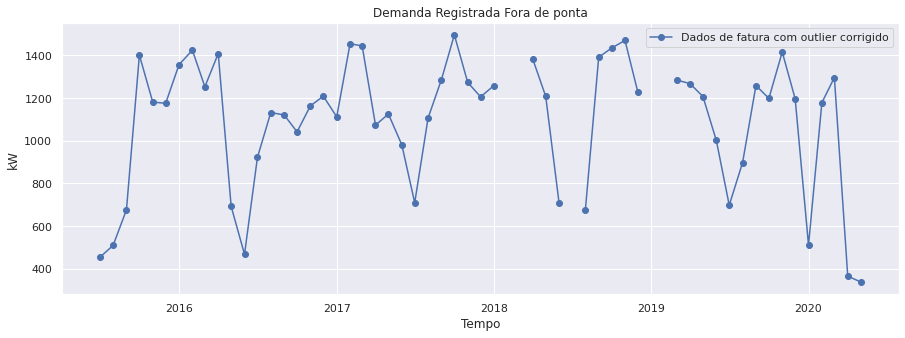

In [ ]:
#trabalhando em remover o outlier da DEMANDA_REGISTRADA_FP e REAT_KVAR_FPONTA
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_df.DATA, UC1_df.DEMANDA_REGISTRADA_FP, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("kW")
_ = plt.legend(['Dados de fatura com outlier devido erro de digitação'])
_ = plt.title("Demanda Registrada Fora de ponta")
plt.show()
print(UC1_df.loc[14,'DEMANDA_REGISTRADA_FP'])
UC1_df.loc[14,'DEMANDA_REGISTRADA_FP'] = 1120.32 #Valor foi incorretamente digitado na tabela
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_df.DATA, UC1_df.DEMANDA_REGISTRADA_FP, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("kW")
_ = plt.legend(['Dados de fatura com outlier corrigido'])
_ = plt.title("Demanda Registrada Fora de ponta")


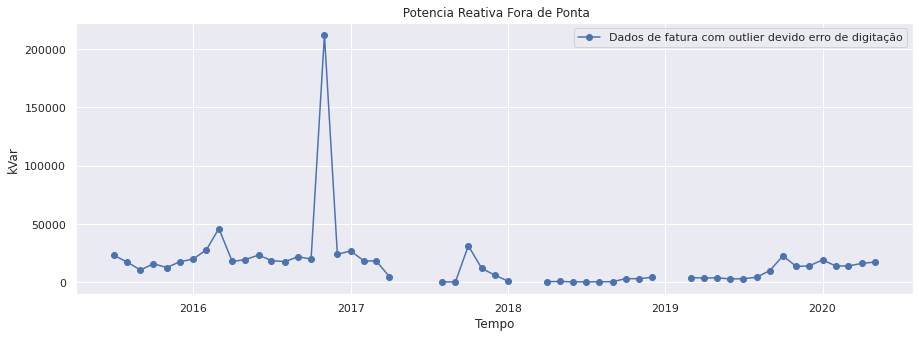

212393.0


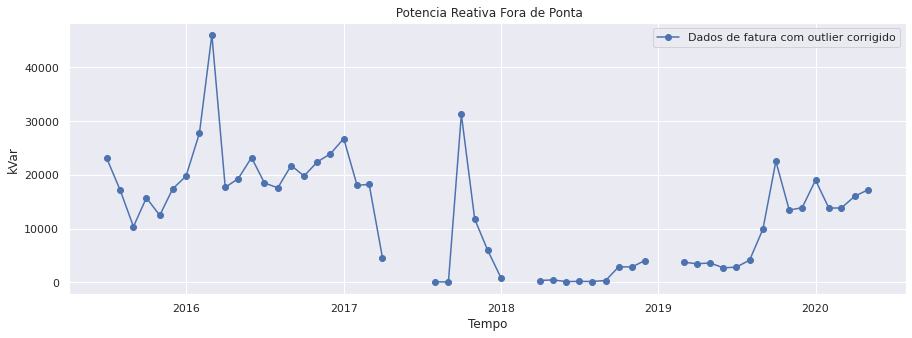

In [ ]:
#Agora para REAT_KVAR_FPONTA
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_df.DATA, UC1_df.REAT_KVAR_FPONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("kVar")
_ = plt.legend(['Dados de fatura com outlier devido erro de digitação'])
_ = plt.title(" Potencia Reativa Fora de Ponta")
plt.show()
print(UC1_df.loc[16,'REAT_KVAR_FPONTA'])
UC1_df.loc[16,'REAT_KVAR_FPONTA'] = 22393 # Valor corrigido conferindo o dado na conta original
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_df.DATA, UC1_df.REAT_KVAR_FPONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("kVar")
_ = plt.legend(['Dados de fatura com outlier corrigido'])
_ = plt.title(" Potencia Reativa Fora de Ponta")
plt.show()

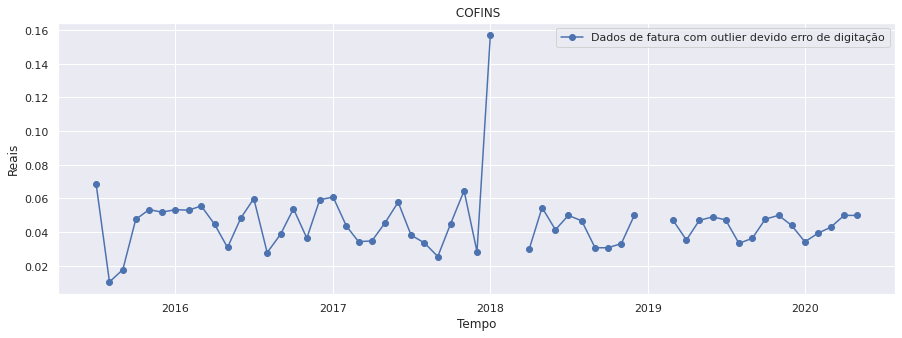

0.15721


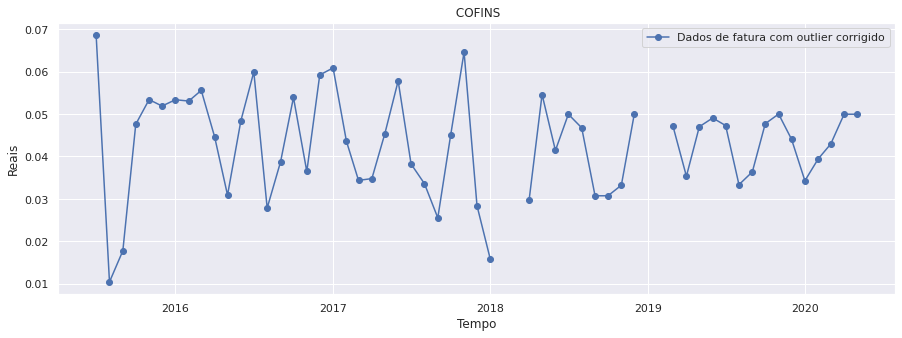

In [ ]:
#Agora para COFINS
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_df.DATA, UC1_df.COFINS, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Reais")
_ = plt.legend(['Dados de fatura com outlier devido erro de digitação'])
_ = plt.title(" COFINS")
plt.show()
print(UC1_df.loc[30,'COFINS'])
UC1_df.loc[30,'COFINS'] = 0.015721 # Corrigindo com o valor encontrado na fatura
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_df.DATA, UC1_df.COFINS, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Reais")
_ = plt.legend(['Dados de fatura com outlier corrigido'])
_ = plt.title(" COFINS")

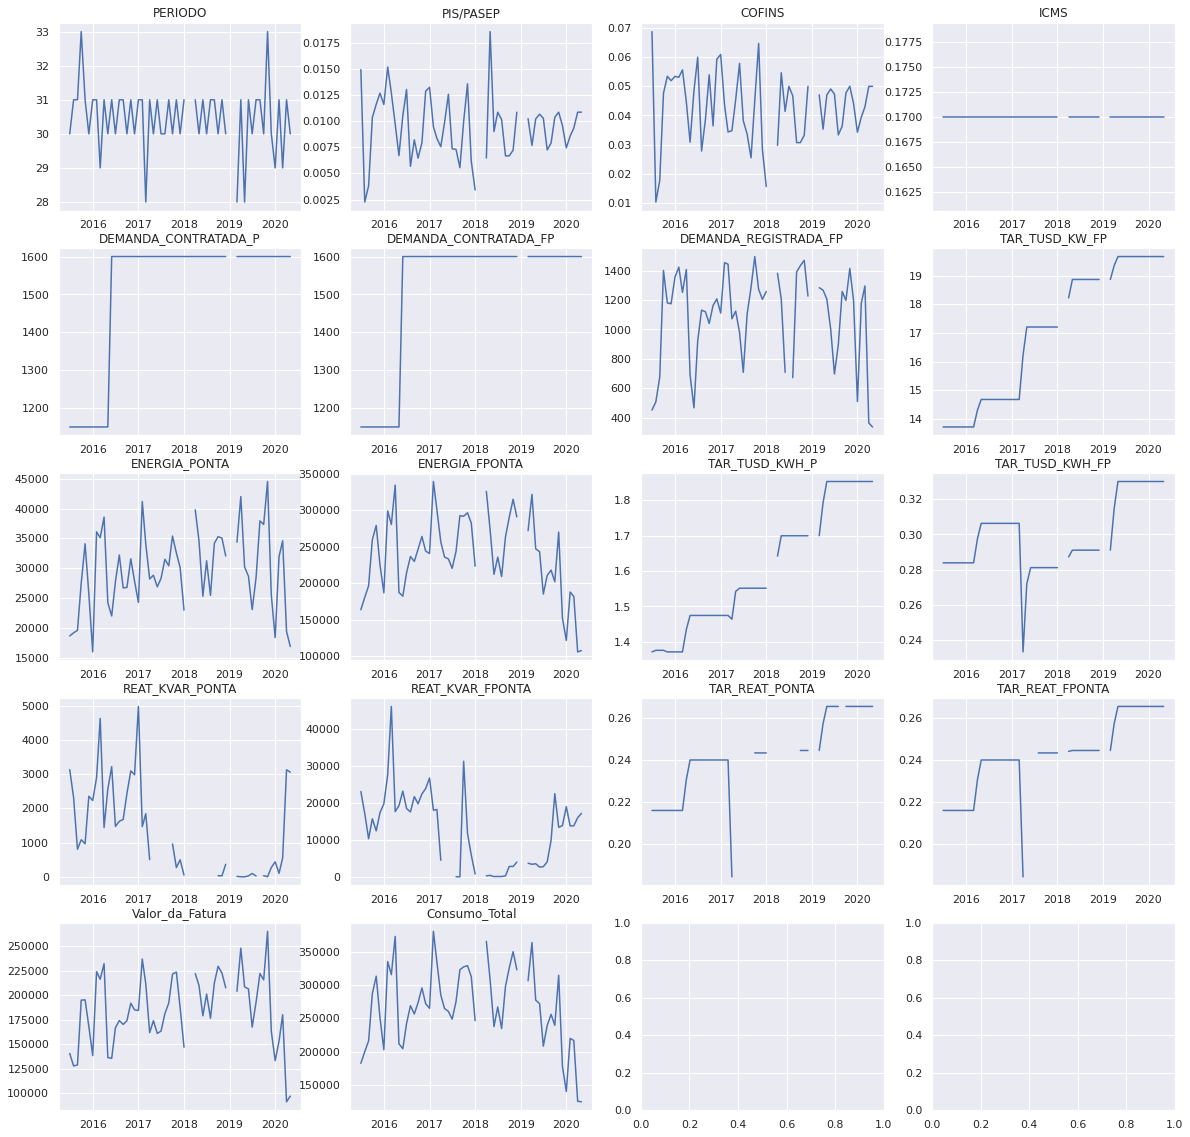

In [ ]:
#Conferindo

f, axs = plt.subplots(5,4,figsize=(20,20))
for i,col in enumerate(UC1_df.columns[3:]):
  plt.subplot(5,4,i+1)
  plt.title(col)
  plt.plot(UC1_df.DATA, UC1_df[col])

#### REAT_KVAR_FPONTA - interpolação quadrática


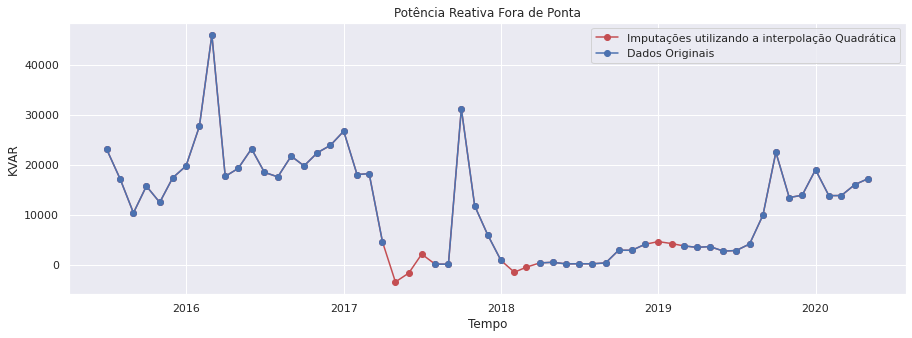

In [ ]:
UC1_quadratica = UC1_df.copy(deep= True)
UC1_quadratica['REAT_KVAR_FPONTA'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.REAT_KVAR_FPONTA, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.REAT_KVAR_FPONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Potência Reativa Fora de Ponta")
plt.show()

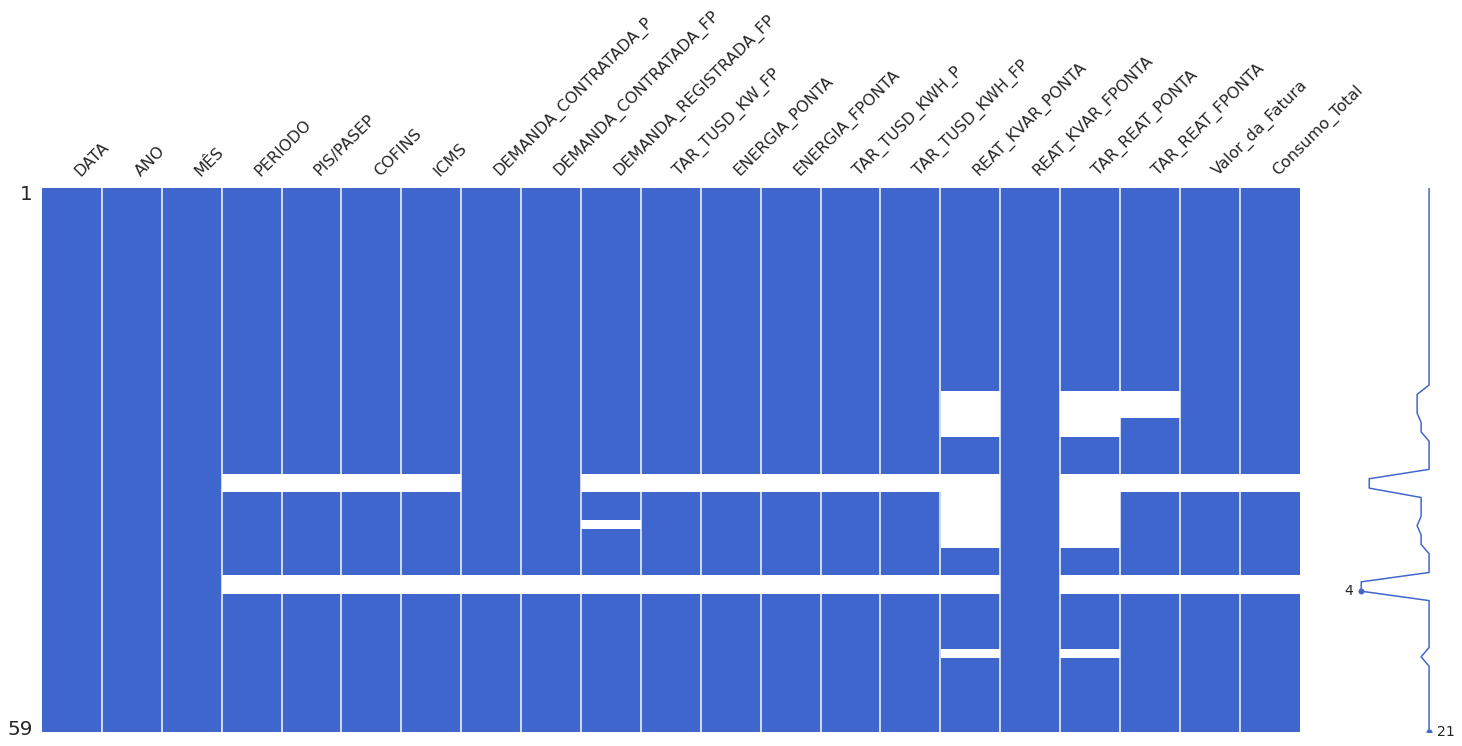

In [ ]:
msno.matrix(UC1_quadratica, color = (0.25,0.4,0.8))

#### REAT_KVAR_PONTA - interpolação quadrática

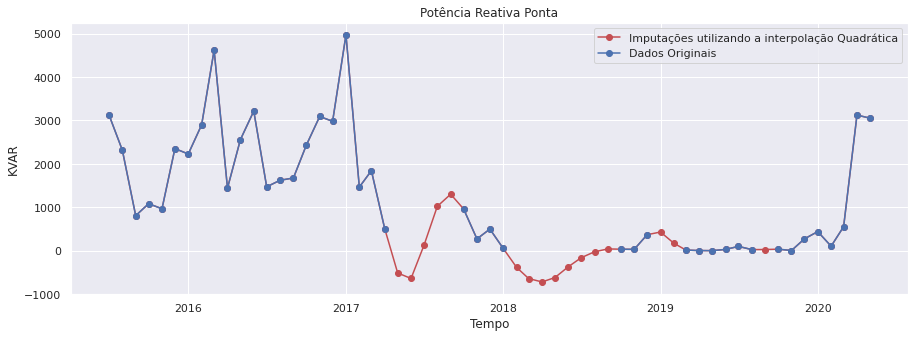

In [ ]:
UC1_quadratica['REAT_KVAR_PONTA'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.REAT_KVAR_PONTA, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.REAT_KVAR_PONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KVAR")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Potência Reativa Ponta")
plt.show()

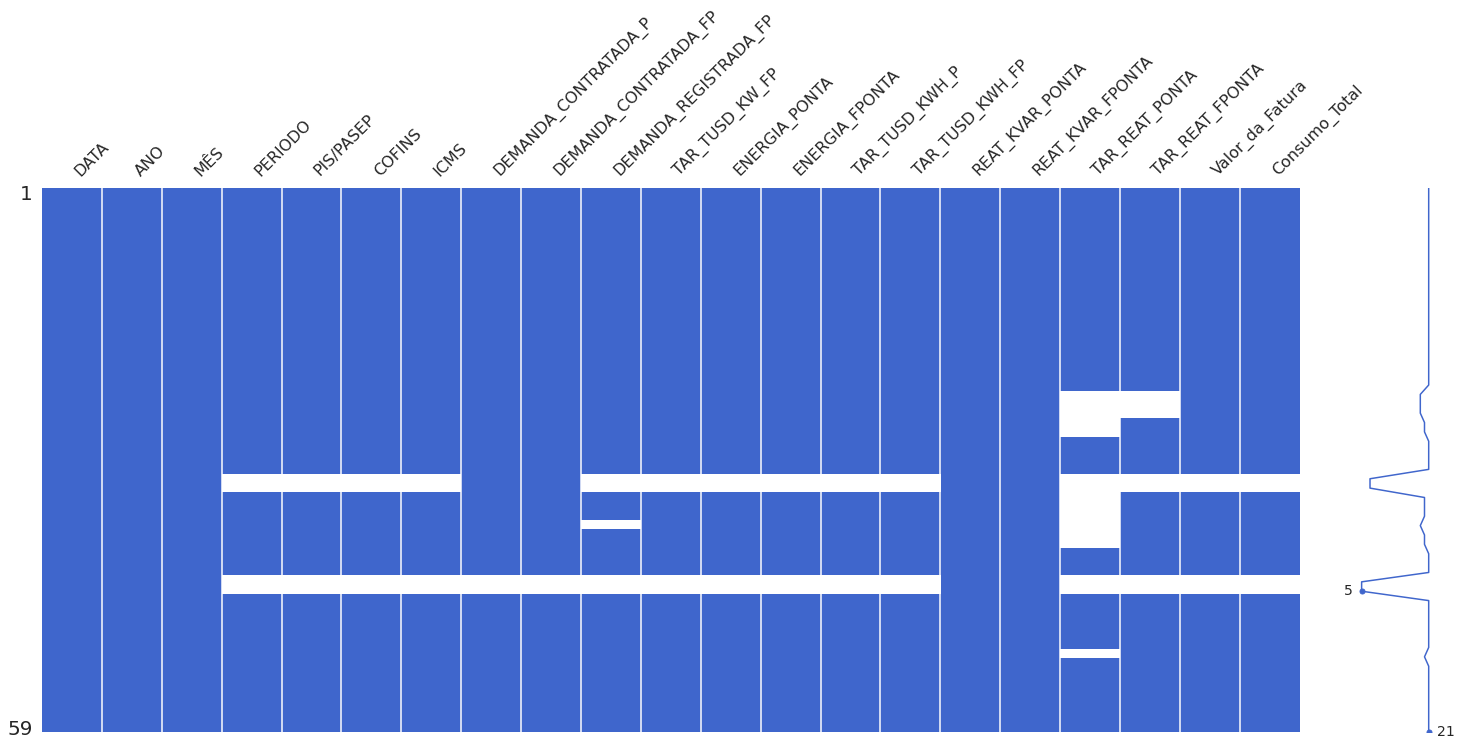

In [ ]:
msno.matrix(UC1_quadratica, color = (0.25,0.4,0.8))

#### TAR_REAT_PONTA


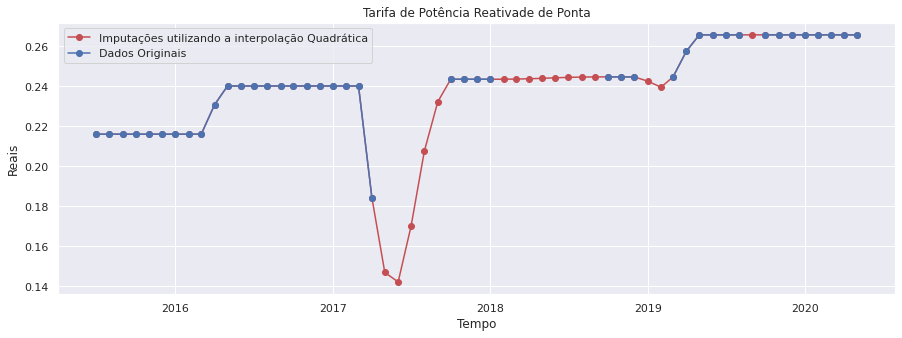

In [ ]:
UC1_quadratica['TAR_REAT_PONTA'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.TAR_REAT_PONTA, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.TAR_REAT_PONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Reais")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Tarifa de Potência Reativade de Ponta")
plt.show()

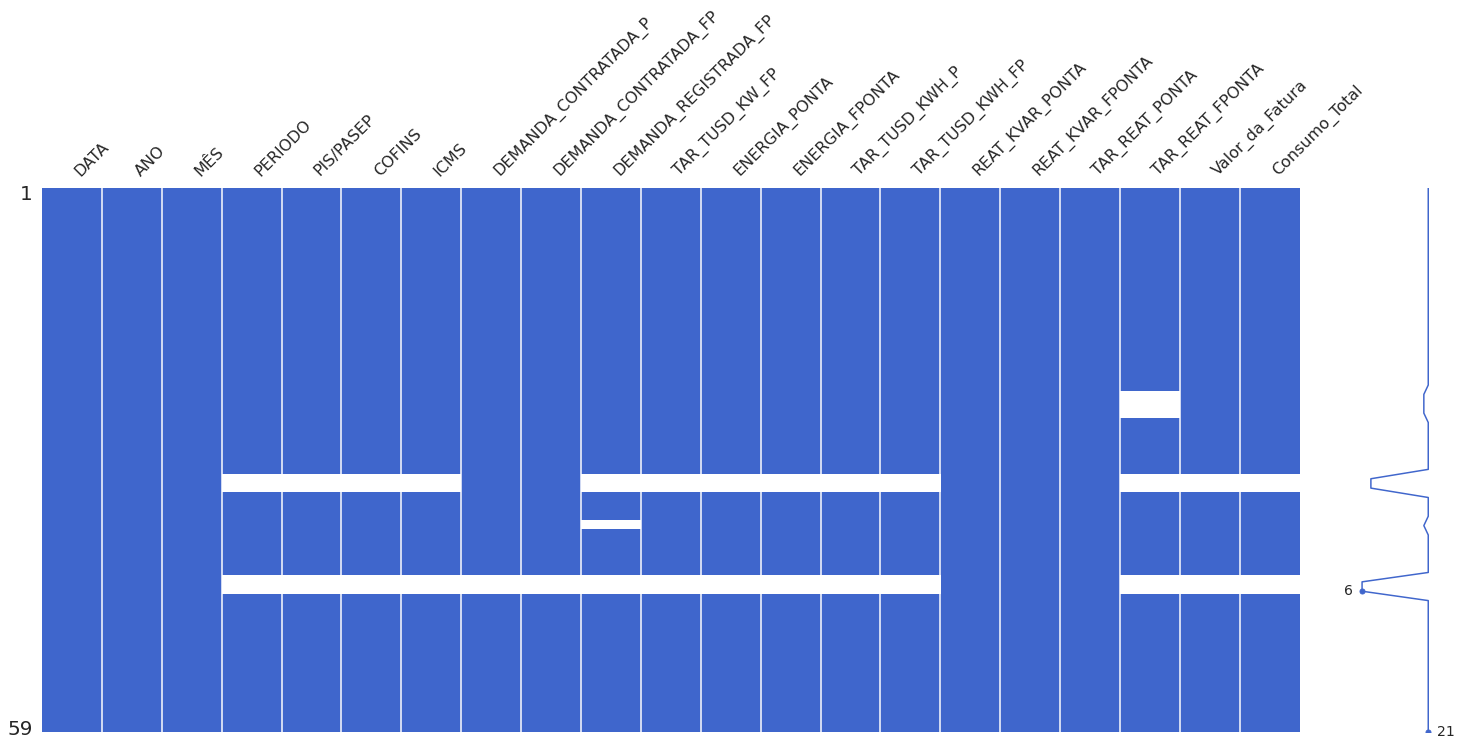

In [ ]:
msno.matrix(UC1_quadratica, color = (0.25,0.4,0.8))

####TAR_REAT_PONTA

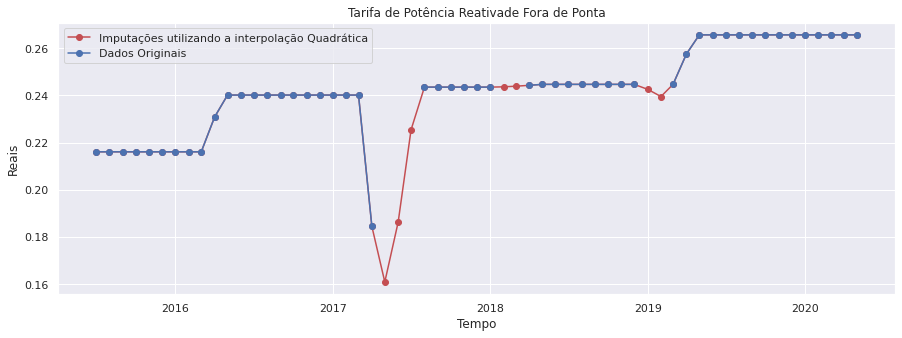

In [ ]:
UC1_quadratica['TAR_REAT_FPONTA'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.TAR_REAT_FPONTA, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.TAR_REAT_FPONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Reais")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Tarifa de Potência Reativade Fora de Ponta")
plt.show()

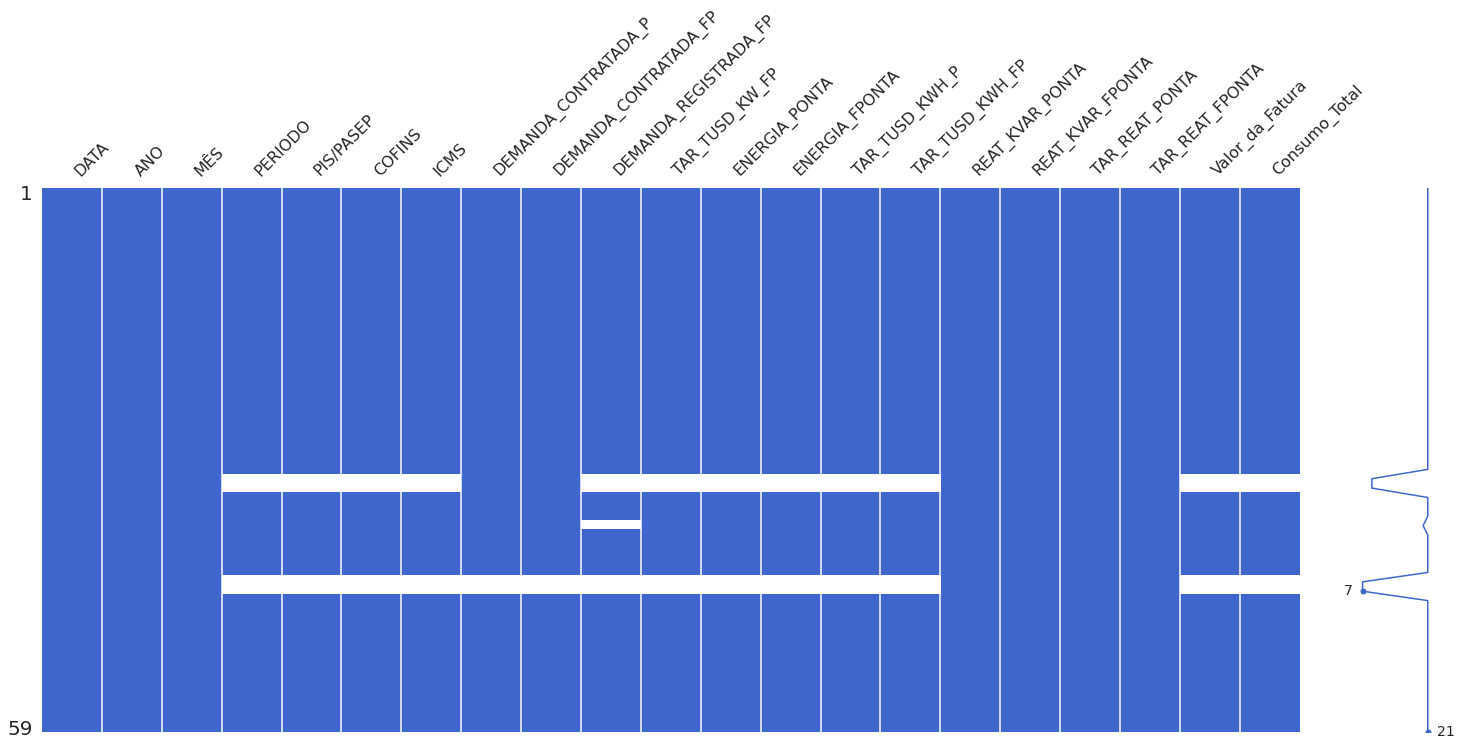

In [ ]:
msno.matrix(UC1_quadratica, color = (0.25,0.4,0.8))

#### TAR_TUSD_KWH_FP E TAR_TUSD_KWH_P


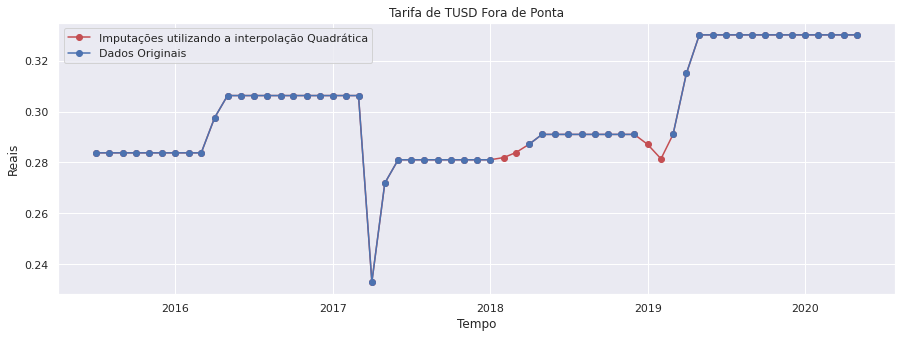

In [ ]:
UC1_quadratica['TAR_TUSD_KWH_FP'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.TAR_TUSD_KWH_FP, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.TAR_TUSD_KWH_FP, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Reais")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Tarifa de TUSD Fora de Ponta")
plt.show()


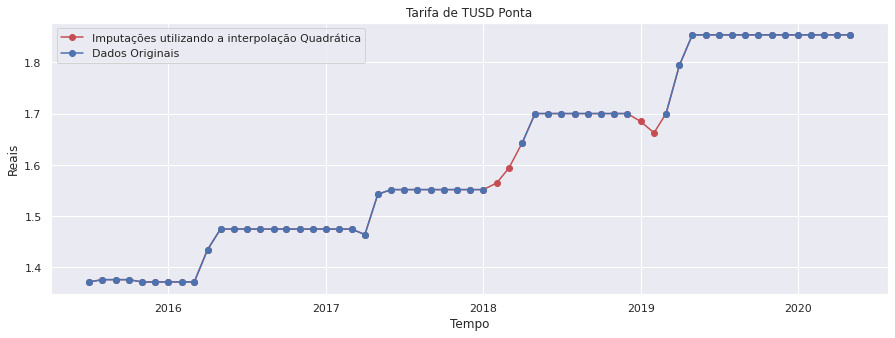

In [ ]:
UC1_quadratica['TAR_TUSD_KWH_P'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.TAR_TUSD_KWH_P, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.TAR_TUSD_KWH_P, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Reais")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Tarifa de TUSD Ponta")
plt.show()

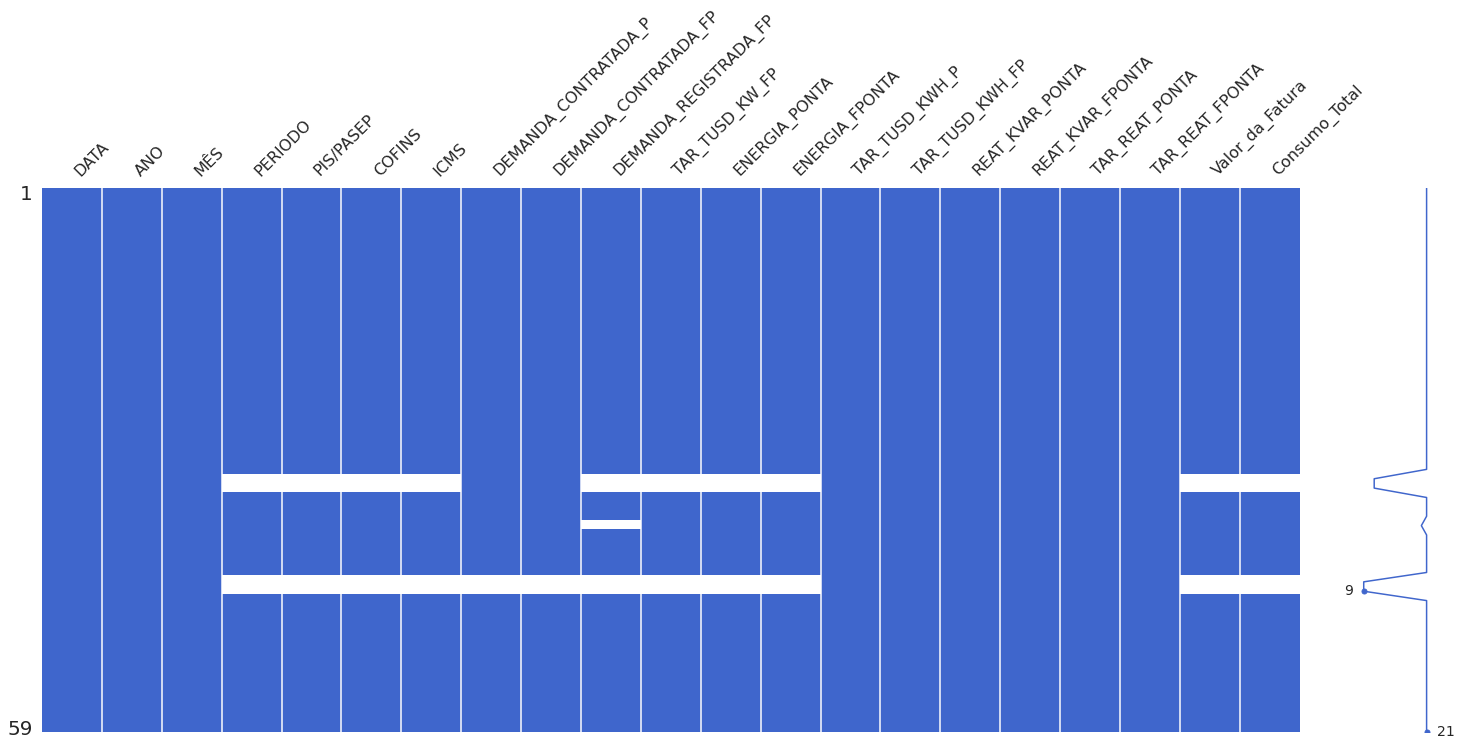

In [ ]:
msno.matrix(UC1_quadratica, color = (0.25,0.4,0.8))

#### ENERGIA_PONTA E ENERGIA_FPONTA

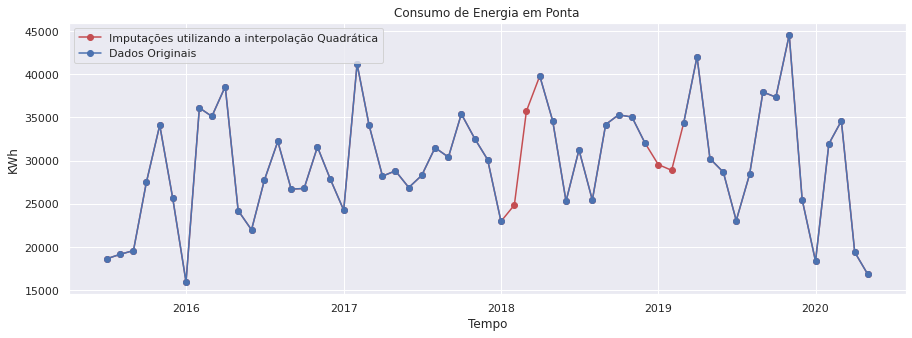

In [ ]:
UC1_quadratica['ENERGIA_PONTA'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.ENERGIA_PONTA, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.ENERGIA_PONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWh")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Consumo de Energia em Ponta")
plt.show()

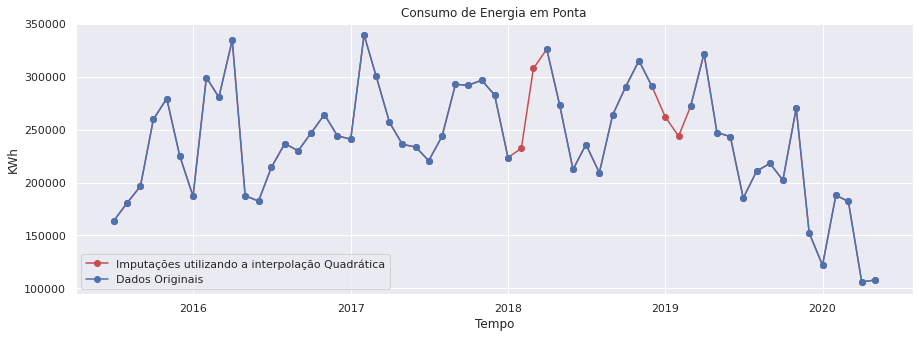

In [ ]:
UC1_quadratica['ENERGIA_FPONTA'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.ENERGIA_FPONTA, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.ENERGIA_FPONTA, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KWh")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Consumo de Energia em Ponta")
plt.show()

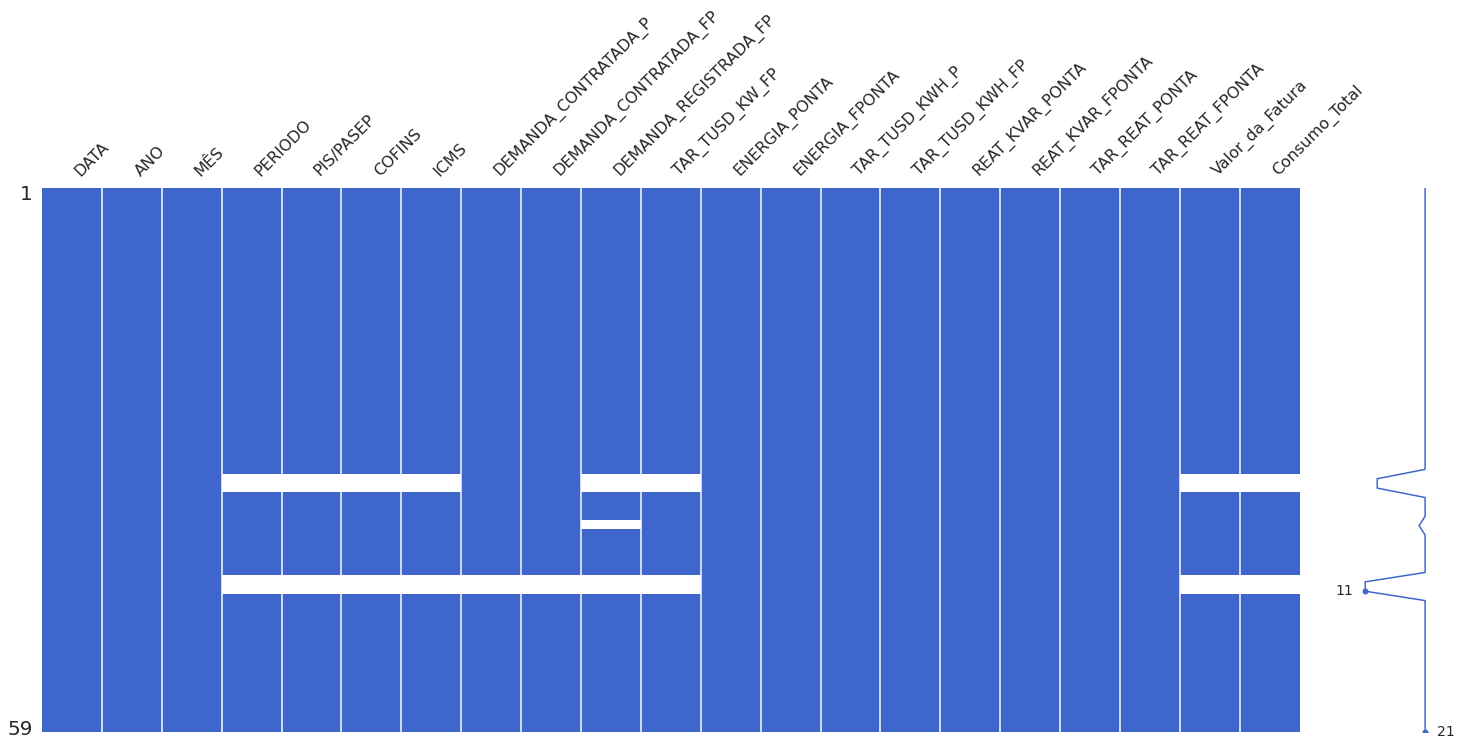

In [ ]:
msno.matrix(UC1_quadratica, color = (0.25,0.4,0.8))

#### TAR_TUSD_KW_FP

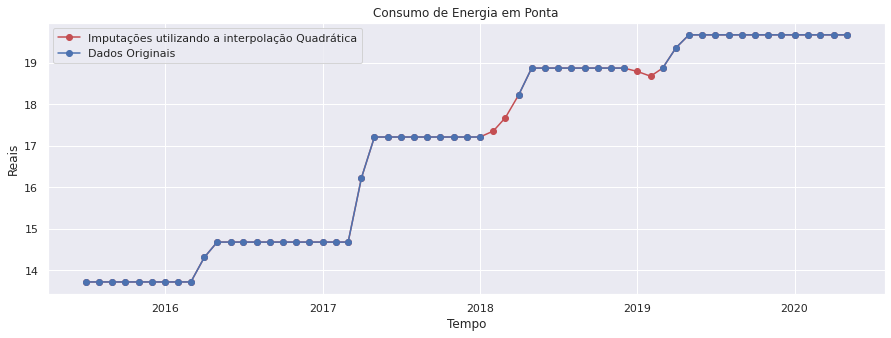

In [ ]:
UC1_quadratica['TAR_TUSD_KW_FP'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.TAR_TUSD_KW_FP, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.TAR_TUSD_KW_FP, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Reais")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Consumo de Energia em Ponta")
plt.show()

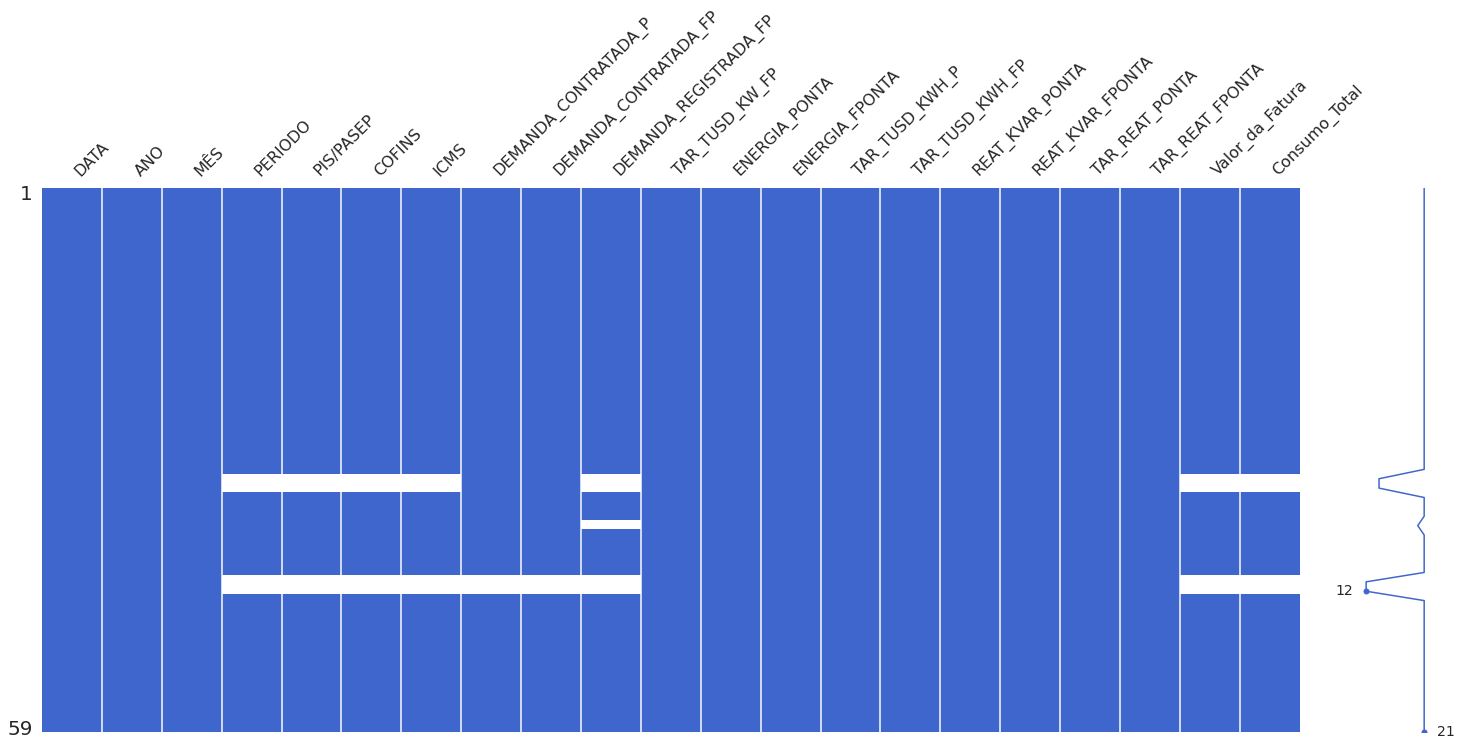

In [ ]:
msno.matrix(UC1_quadratica, color = (0.25,0.4,0.8))

#### DEMANDA_CONTRATADA_P, DEMANDA_CONTRATADA_FP, DEMANDA_REGISTRADA_FP, DEMANDA_REGISTRADA_P

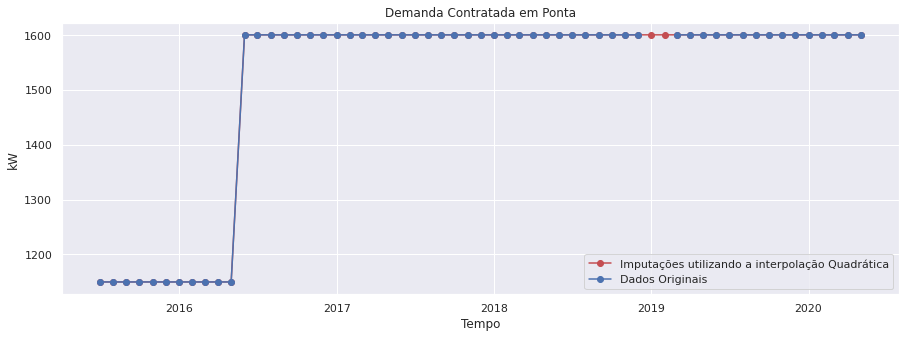

In [ ]:
UC1_quadratica['DEMANDA_CONTRATADA_P'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.DEMANDA_CONTRATADA_P, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.DEMANDA_CONTRATADA_P, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("kW")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Demanda Contratada em Ponta")
plt.show()

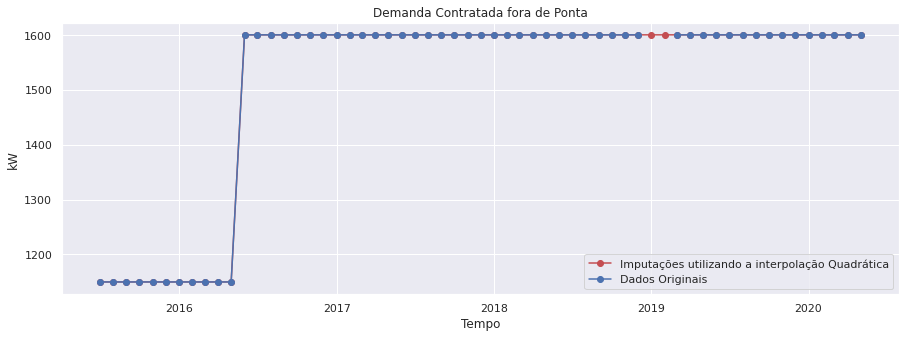

In [ ]:
UC1_quadratica['DEMANDA_CONTRATADA_FP'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.DEMANDA_CONTRATADA_FP, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.DEMANDA_CONTRATADA_FP, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("kW")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Demanda Contratada fora de Ponta")
plt.show()

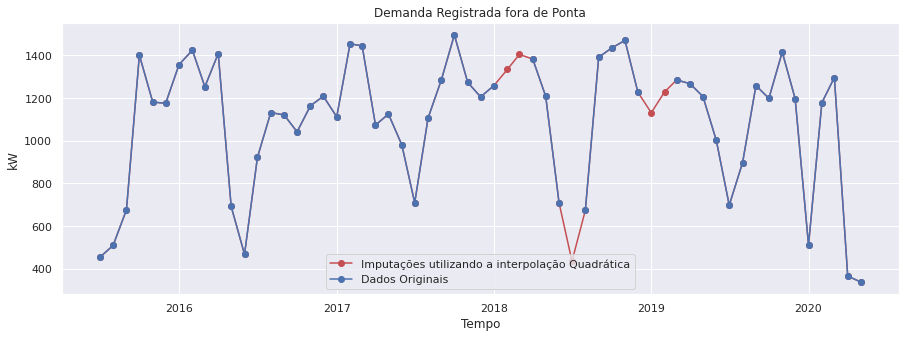

In [ ]:

UC1_quadratica['DEMANDA_REGISTRADA_FP'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.DEMANDA_REGISTRADA_FP, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.DEMANDA_REGISTRADA_FP, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("kW")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Demanda Registrada fora de Ponta")
plt.show()

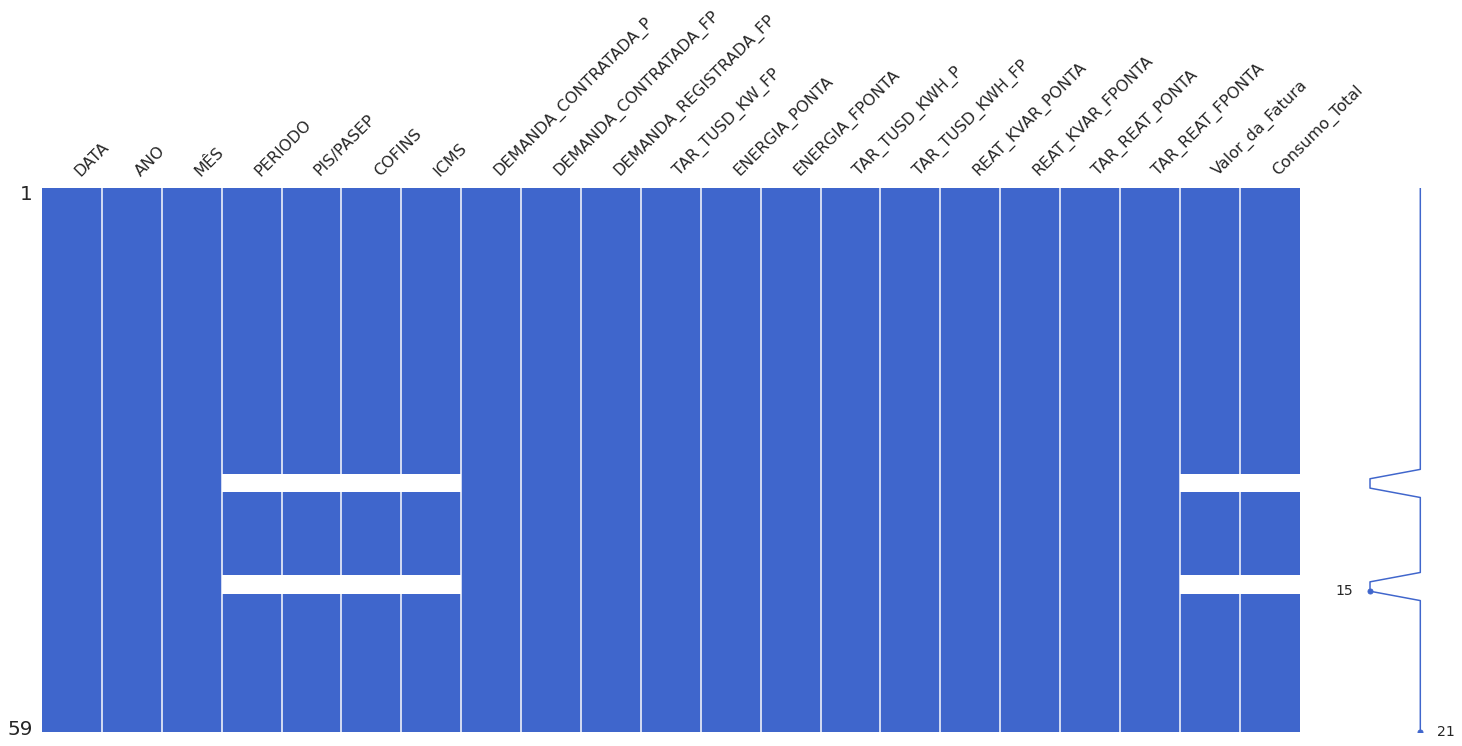

In [ ]:
msno.matrix(UC1_quadratica, color = (0.25,0.4,0.8))

#### PERIODO, PIS/PASEP, COFINS, ICMS

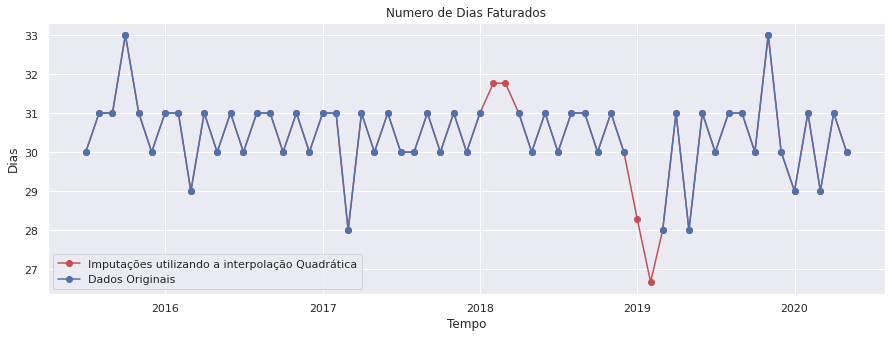

In [ ]:
UC1_quadratica['PERIODO'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.PERIODO, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.PERIODO, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Dias")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Numero de Dias Faturados")
plt.show()

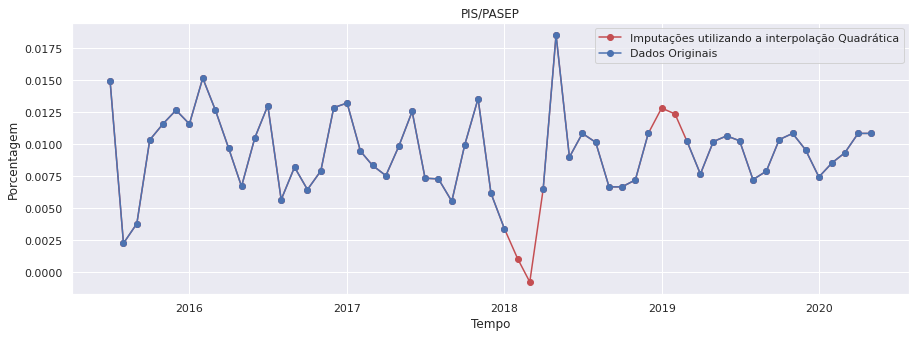

In [ ]:
UC1_quadratica.rename(columns = {'PIS/PASEP':'PIS_PASEP'}, inplace = True) #Altera nome da coluna PIS/PASP para concertar erro causado pela / no nome da coluna
UC1_df.rename(columns = {'PIS/PASEP':'PIS_PASEP'}, inplace = True) #Altera nome da coluna PIS/PASP para concertar erro causado pela / no nome da coluna
UC1_quadratica['PIS_PASEP'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.PIS_PASEP, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.PIS_PASEP, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Porcentagem")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("PIS/PASEP")
plt.show()

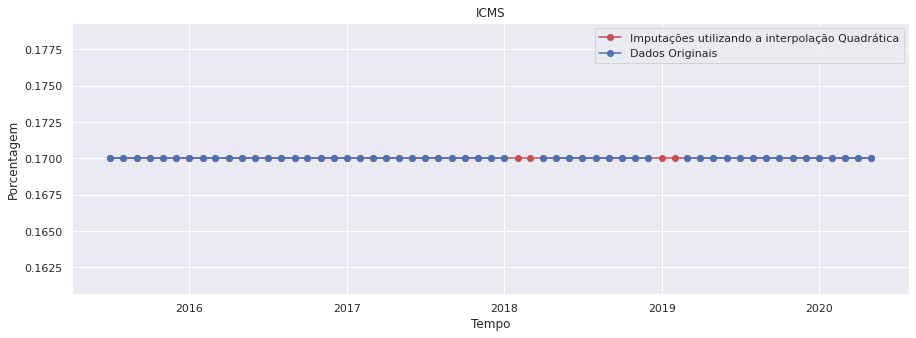

In [ ]:
UC1_quadratica['ICMS'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.ICMS, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.ICMS, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Porcentagem")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("ICMS")
plt.show()

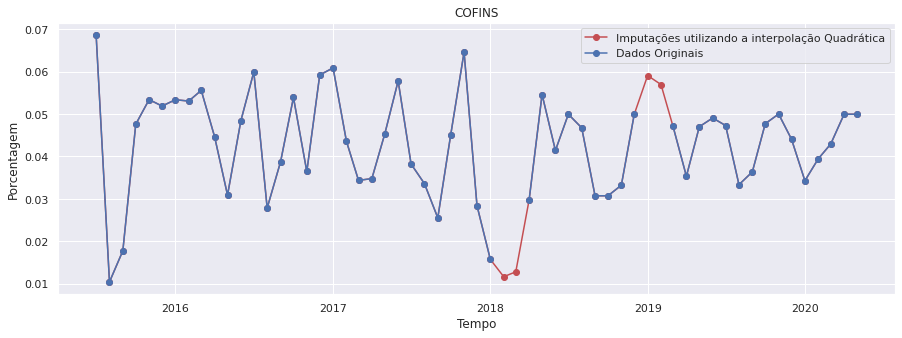

In [ ]:
UC1_quadratica['COFINS'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.COFINS, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.COFINS, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Porcentagem")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("COFINS")
plt.show()

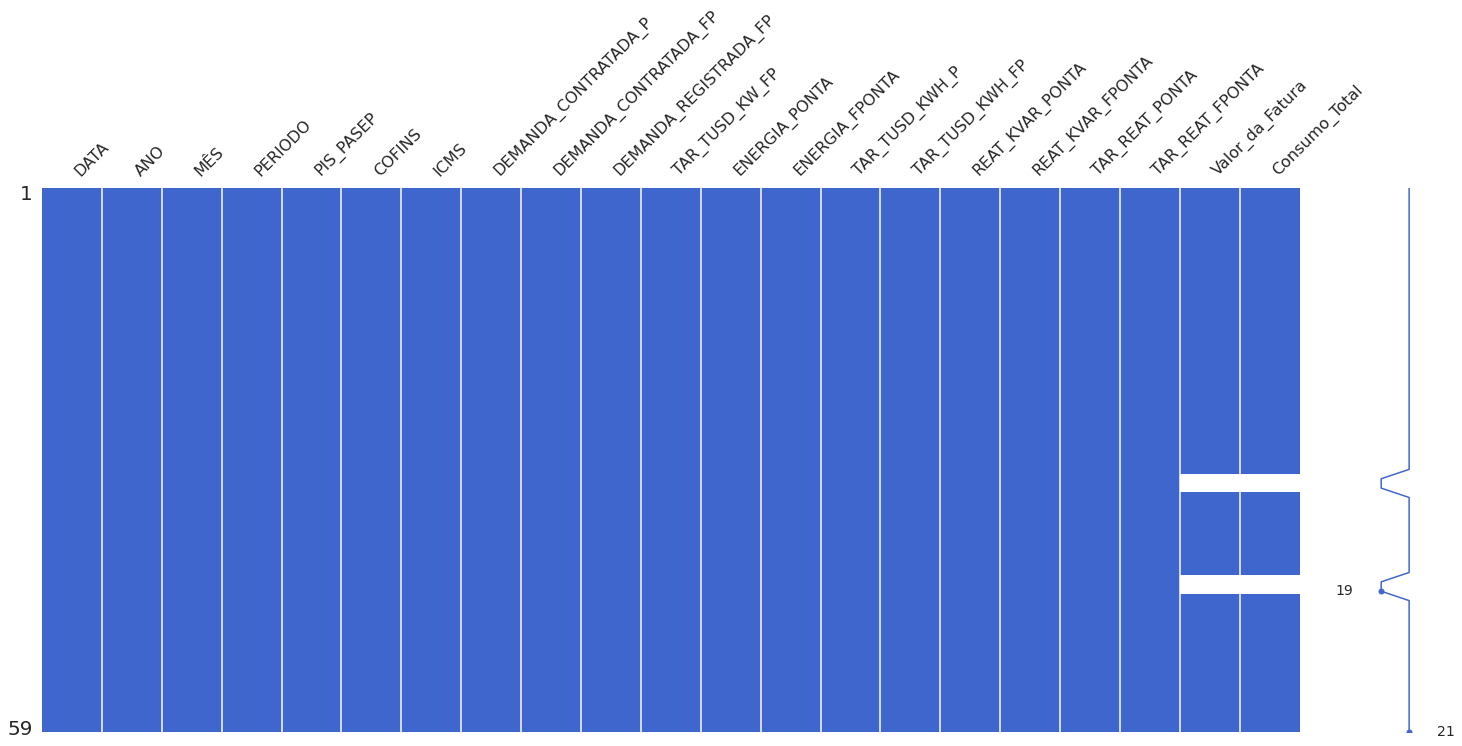

In [ ]:
msno.matrix(UC1_quadratica, color = (0.25,0.4,0.8))

#### Valor da Fatura e Consumo Total

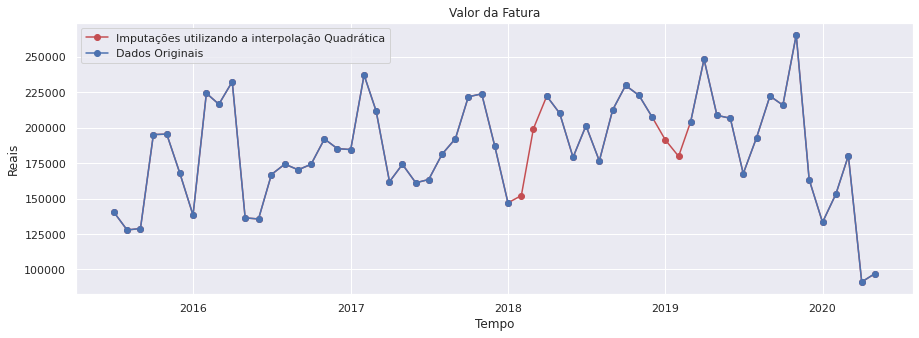

In [ ]:
UC1_quadratica['Valor_da_Fatura'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.Valor_da_Fatura, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.Valor_da_Fatura, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("Reais")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Valor da Fatura")
plt.show()

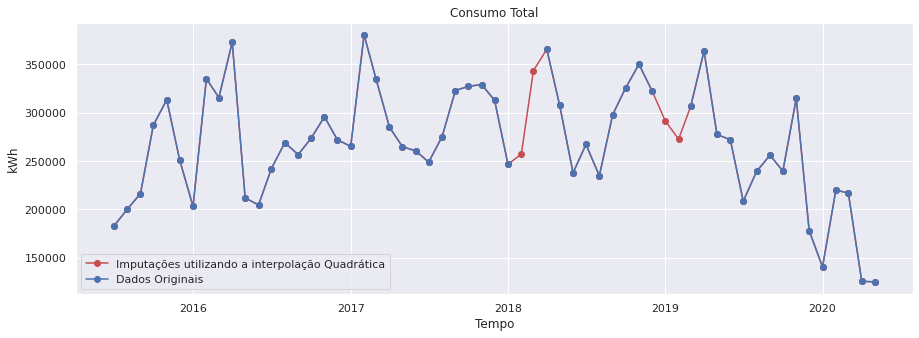

In [ ]:
UC1_quadratica['Consumo_Total'].interpolate(method = 'quadratic', inplace = True)
sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(UC1_quadratica.DATA, UC1_quadratica.Consumo_Total, marker='o', color="r")
_ = plt.plot(UC1_df.DATA, UC1_df.Consumo_Total, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("kWh")
_ = plt.legend(['Imputações utilizando a interpolação Quadrática', 'Dados Originais'])
_ = plt.title("Consumo Total")
plt.show()

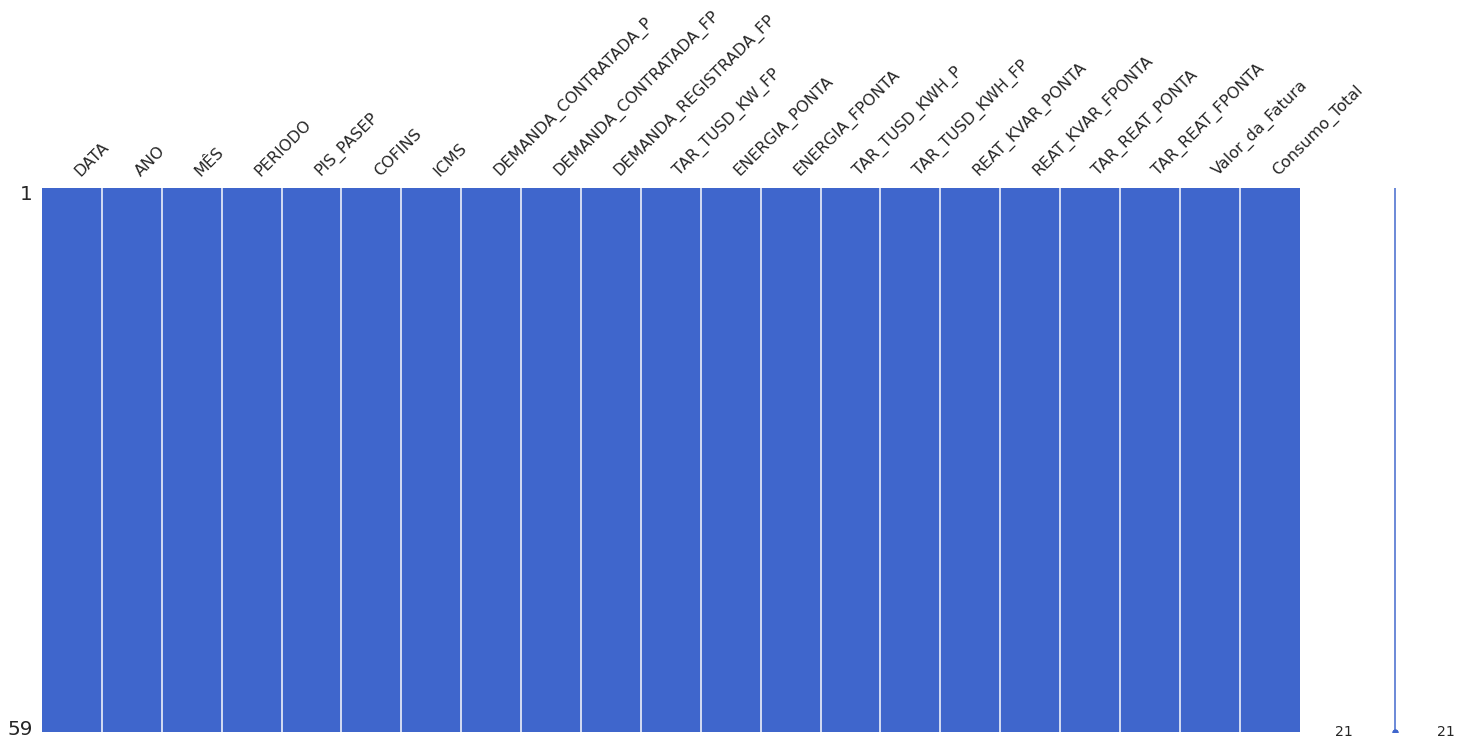

In [ ]:
msno.matrix(UC1_quadratica, color = (0.25,0.4,0.8))


#### Conclusão

Foi realizada a correção de todos os dados utilizados na analise, imputando pelo metodo de interpolação quadratica valores para preencherem as colunas que serão analisada. Os dados outliers dos dados a ser analisados foram identificados como erros na digitação e corrigidos antes da interpolação.



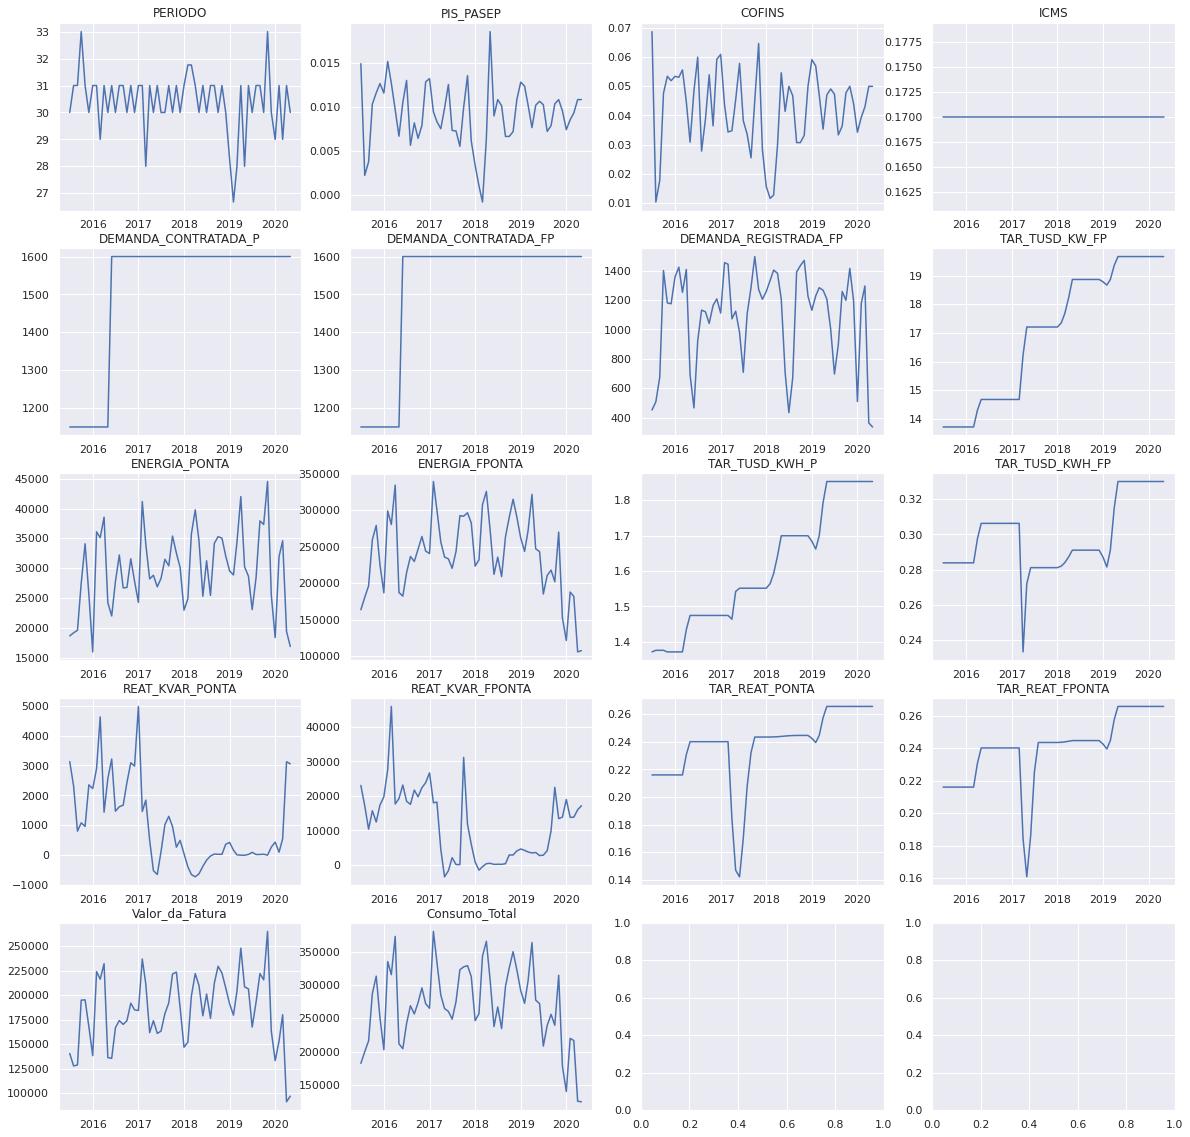

In [ ]:

f, axs = plt.subplots(5, 4,figsize=(20,20))
for i,col in enumerate(UC1_quadratica.columns[3:]):
  plt.subplot(5, 4, i+1)
  plt.title(col)
  plt.plot(UC1_quadratica.DATA, UC1_quadratica[col])

# Data Modeling



## Dataset preparation

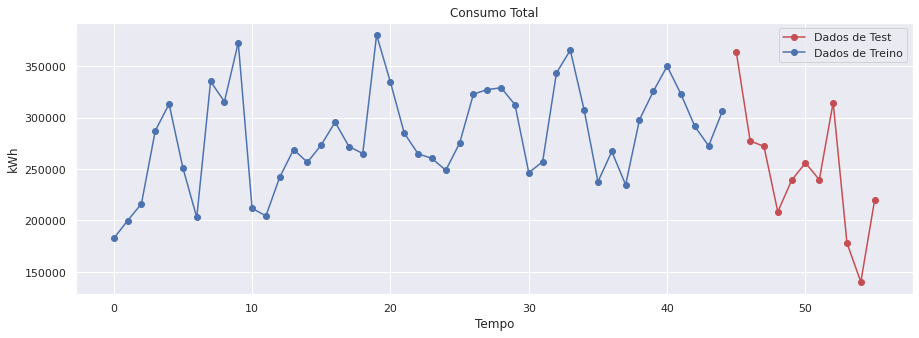

In [ ]:
df_train = UC1_quadratica["Consumo_Total"].iloc[:45]
df_test = UC1_quadratica["Consumo_Total"].iloc[45:56] # Limitando os dados até fev, evitando o impacto da pandemia na analise
#Preparados os dados, vamos vizualizar os modelos
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("kWh")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino'])
_ = plt.title("Consumo Total")
plt.show()

### Definindo a função split_sequence

In [ ]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
             break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

### Modelo de Regressão Linear com uma amostra passada

In [ ]:
X_train, Y_train = split_sequence(df_train.values,1)
X_test, Y_test = split_sequence(df_test.values,1)

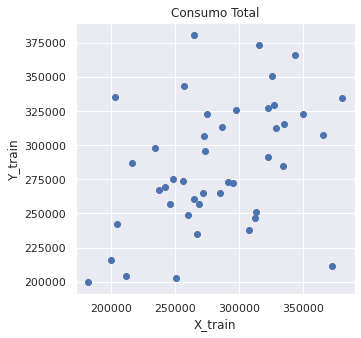

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(X_train,Y_train)
_ = plt.title("Consumo Total")
_ = plt.xlabel("X_train")
_ = plt.ylabel("Y_train")

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
modelo = LinearRegression() 
modelo.fit(X_train, Y_train) # treinamento do modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
modelo.coef_

array([0.38990048])

In [ ]:
previsoes = modelo.predict(X_test)
df_previsoes1 = pd.DataFrame(previsoes,index=range(45,55,1))

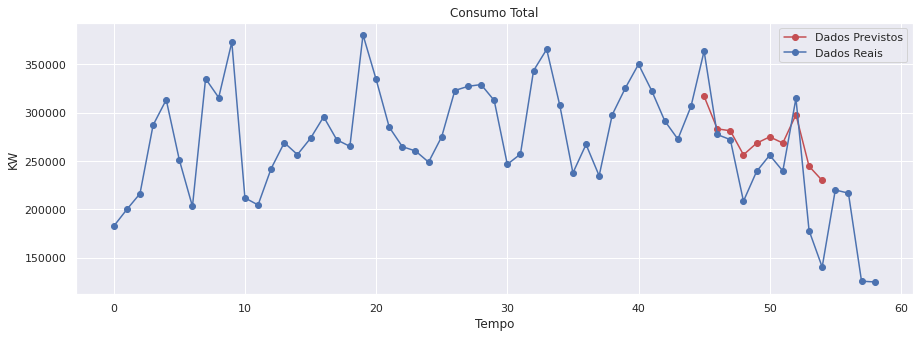

0
50  274993.081026
51  268584.286755
52  297886.867798
53  244566.806786
54  229825.449252

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_previsoes1, marker='o', color="r")
_ = plt.plot(UC1_quadratica["Consumo_Total"], marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados Previstos', 'Dados Reais'])
_ = plt.title("Consumo Total")
plt.show()
df_previsoes1.tail()


### Modelo de Regressão Linear com 4 amostras passadas

In [ ]:
X_train, Y_train = split_sequence(df_train.values,4)
X_test, Y_test = split_sequence(df_test.values,4)

In [ ]:
X_test


array([[363809., 277434., 272077., 208385.],
       [277434., 272077., 208385., 239155.],
       [272077., 208385., 239155., 256032.],
       [208385., 239155., 256032., 239595.],
       [239155., 256032., 239595., 314749.],
       [256032., 239595., 314749., 177996.],
       [239595., 314749., 177996., 140188.]])

In [ ]:
Y_test

array([239155., 256032., 239595., 314749., 177996., 140188., 219990.])

In [ ]:
modelo = LinearRegression() 
modelo.fit(X_train, Y_train) # treinamento do modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
modelo.coef_

array([ 0.12733586, -0.2553005 , -0.200995  ,  0.37349954])

In [ ]:
previsoes = modelo.predict(X_test)
df_previsoes2 = pd.DataFrame(previsoes,index=range(48,55,1))

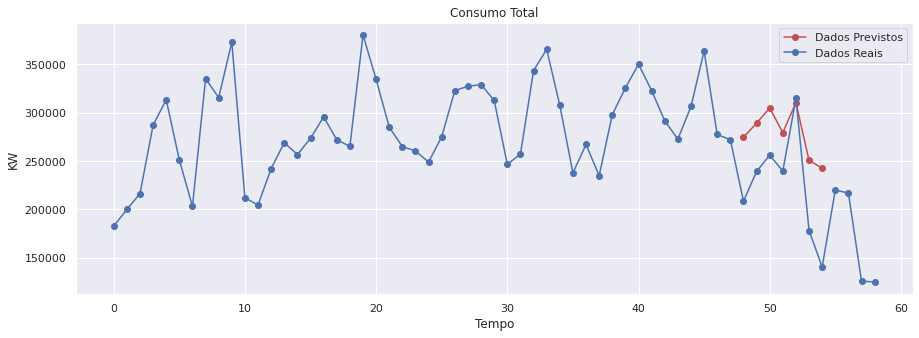

0
50  304882.750602
51  279385.473984
52  310368.631273
53  250531.291831
54  242616.816635

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_previsoes2, marker='o', color="r")
_ = plt.plot(UC1_quadratica["Consumo_Total"], marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados Previstos', 'Dados Reais'])
_ = plt.title("Consumo Total")
plt.show()
df_previsoes2.tail()

### Modelo de Regressão Linear com 2 amostras passadas

In [ ]:
X_train, Y_train = split_sequence(df_train.values,2)
X_test, Y_test = split_sequence(df_test.values,2)

In [ ]:
modelo = LinearRegression() 
modelo.fit(X_train, Y_train) # treinamento do modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
modelo.coef_


array([-0.2704223 ,  0.45639762])

In [ ]:
previsoes = modelo.predict(X_test)
df_previsoes3 = pd.DataFrame(previsoes,index=range(46,55,1))

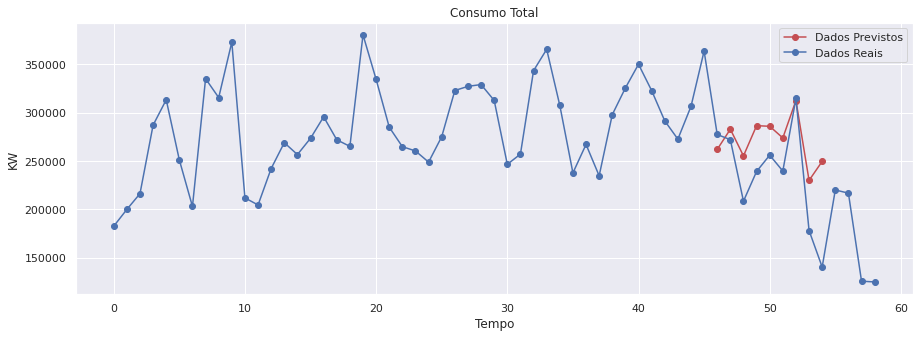

0
50  285940.501716
51  273874.776896
52  312619.815176
53  229882.753756
54  249608.332560

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_previsoes3, marker='o', color="r")
_ = plt.plot(UC1_quadratica["Consumo_Total"], marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados Previstos', 'Dados Reais'])
_ = plt.title("Consumo Total")
plt.show()
df_previsoes3.tail()

### Keras modelo de Regressão Linear Clássico Functional Code

In [ ]:
# Load layers
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping

# Input layer
input_tensor = Input(shape=(1), name='Entrada')

# Create a dense layer and connect the dense layer to the input_tensor in one step
# Note that we did this in 2 steps in the previous exercise, but are doing it in one step now
output_tensor = Dense(units=1, name = 'Saida')(input_tensor)

In [ ]:
from keras.models import Model

In [ ]:
model = Model(input_tensor, output_tensor)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Entrada (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
Saida (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


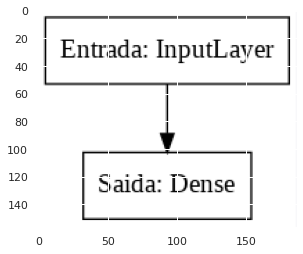

In [ ]:
# Import the plotting function
from keras.utils import plot_model
import matplotlib.pyplot as plt
# Plot the model
plot_model(model, to_file='model.png')

# Display the image
data = plt.imread('model.png')
plt.imshow(data)
plt.show()

In [ ]:
X_train, Y_train = split_sequence(df_train.values,1)
X_test, Y_test = split_sequence(df_test.values,1)

In [ ]:
#Se define o early stoping
early_stopping_monitor = EarlyStopping(patience=2)
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, validation_split=0.20, callbacks=[early_stopping_monitor], verbose=True)

Epoch 1/100
35/35 [==============================] - 0s 5ms/step - loss: 69353236821.3333 - val_loss: 72667144192.0000
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 70856282453.3333 - val_loss: 67631550464.0000
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 59703536981.3333 - val_loss: 62876155904.0000
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 50766826040.8889 - val_loss: 58309808128.0000
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 46320193877.3333 - val_loss: 54075957248.0000
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 50649655751.1111 - val_loss: 50019786752.0000
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 50099494570.6667 - val_loss: 46239617024.0000
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 41138122865.7778 - val_loss: 42760048640.0000
Epoch 9/100
35/35 [=============================

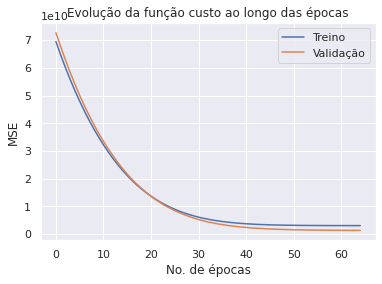

In [ ]:
# Visualize history
# Plot history: Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Evolução da função custo ao longo das épocas')
plt.ylabel('MSE')
plt.xlabel('No. de épocas')
plt.legend(['Treino', 'Validação'])
plt.show()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
df_previsoes4 = pd.DataFrame(previsoes,index=range(46,55,1))

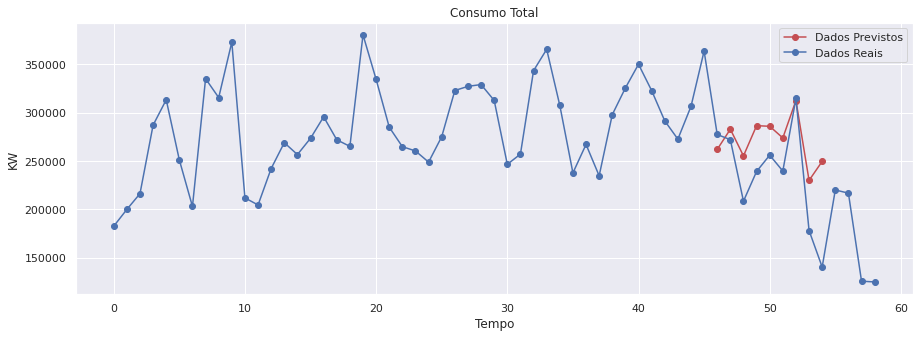

0
50  285940.501716
51  273874.776896
52  312619.815176
53  229882.753756
54  249608.332560

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_previsoes4, marker='o', color="r")
_ = plt.plot(UC1_quadratica["Consumo_Total"], marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados Previstos', 'Dados Reais'])
_ = plt.title("Consumo Total")
plt.show()
df_previsoes4.tail()

Comparando todos os resultados


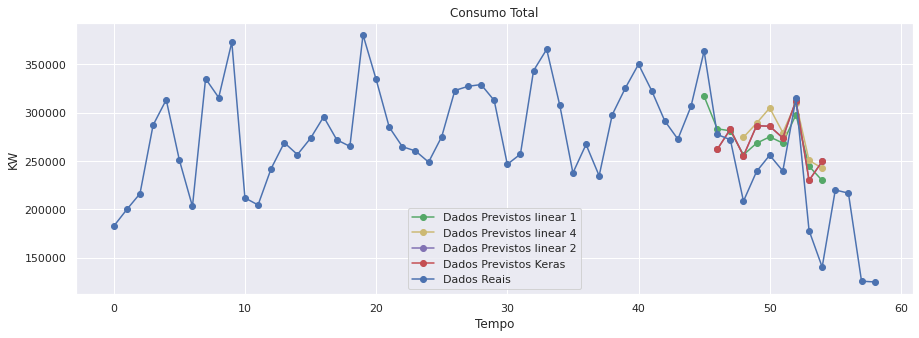

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_previsoes1, marker='o', color="g")
_ = plt.plot(df_previsoes2, marker='o', color="y")
_ = plt.plot(df_previsoes3, marker='o', color="m")
_ = plt.plot(df_previsoes4, marker='o', color="r")
_ = plt.plot(UC1_quadratica["Consumo_Total"], marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados Previstos linear 1','Dados Previstos linear 4','Dados Previstos linear 2','Dados Previstos Keras', 'Dados Reais'])
_ = plt.title("Consumo Total")
plt.show()